# Plotting 

## Config

In [20]:

import os
import json
from glob import glob
from collections import defaultdict


import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt

In [21]:
# ------------------------------- setting start ------------------------------ #
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 23}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)


# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)
# -------------------------------- setting end ------------------------------- #

In [22]:
SCENE_NAME_LIST = ['drjohnson-dw50', 'bicycle-dw50', 'ficus', 'hotdog', 'lego', 'mic', 'ship']


def set_metric_ylim_fig(ax, metric_key, scene_name):
    """
    Set fixed y-axis limits for different metrics to ensure consistency across plots.
    
    Args:
        ax: matplotlib axes object
        metric_key: string, one of 'PSNR', 'SSIM', 'LPIPS'
    """
    
    # for outdoor scene (NeRF MIP360)
    if 'bicycle' in scene_name:
        if metric_key == 'PSNR':
            ax.set_ylim(20, 24)
        elif metric_key == 'SSIM':
            ax.set_ylim(0.35, 0.65)
        elif metric_key == 'LPIPS':
            pass
            # ax.set_ylim(0, 0.2)
    elif 'drjohnson' in scene_name:
        pass
    # for synthetic scenes (NeRF blender)
    else: 
        if metric_key == 'PSNR':
            ax.set_ylim(24.5, 35.0)
        elif metric_key == 'SSIM':
            ax.set_ylim(0.8, 1.0)
        elif metric_key == 'LPIPS':
            # ax.set_ylim(0, 0.2)
            pass
    
def set_metric_ylim_delta(ax, metric_key):
    """
    Set fixed y-axis limits for delta plots.
    
    Args:
        ax: matplotlib axes object
        metric_key: string, one of 'PSNR', 'SSIM', 'LPIPS'
    """
    if metric_key == 'PSNR':
        ax.set_ylim(-0.5, 5.5)  # Delta range for PSNR improvement
    elif metric_key == 'SSIM':
        ax.set_ylim(-0.01, 0.10)  # Delta range for SSIM improvement
    elif metric_key == 'LPIPS':
        # ax.set_ylim(-0.15, 0.01)  # Delta range for LPIPS improvement (lower is better)
        pass


## Figure Budget Policy


Plotting PSNR
Pure Mesh - PSNR: mean=27.5558, std=1.7082, n=33

Processing Area-based:
  Budget 40000: mean=27.5690, std=1.7293, splats=40000
  Budget 80000: mean=27.5821, std=1.7370, splats=80000
  Budget 160000: mean=27.5958, std=1.7470, splats=160000
  Budget 320000: mean=27.6293, std=1.7737, splats=320000
  Budget 640000: mean=27.7068, std=1.8276, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=27.6838, std=1.7615, splats=40000
  Budget 80000: mean=27.7681, std=1.7652, splats=80000
  Budget 160000: mean=27.9014, std=1.7667, splats=160000
  Budget 320000: mean=28.1208, std=1.7915, splats=320000
  Budget 640000: mean=28.4448, std=1.8694, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=27.5793, std=1.7104, splats=40000
  Budget 80000: mean=27.6069, std=1.7242, splats=80000
  Budget 160000: mean=27.6478, std=1.7269, splats=160000
  Budget 320000: mean=27.7226, std=1.7210, splats=320000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_drjohnson-dw50.png and .eps



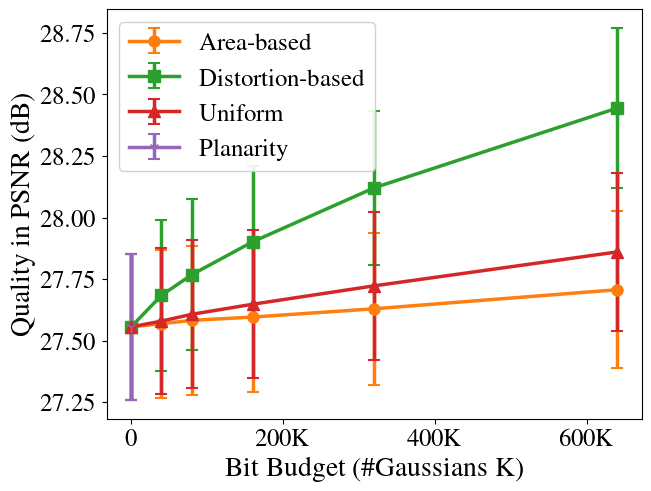


Plotting SSIM
Pure Mesh - SSIM: mean=0.8487, std=0.0602, n=33

Processing Area-based:
  Budget 40000: mean=0.8481, std=0.0599, splats=40000
  Budget 80000: mean=0.8478, std=0.0597, splats=80000
  Budget 160000: mean=0.8474, std=0.0595, splats=160000
  Budget 320000: mean=0.8471, std=0.0593, splats=320000
  Budget 640000: mean=0.8474, std=0.0592, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.8497, std=0.0600, splats=40000
  Budget 80000: mean=0.8505, std=0.0598, splats=80000
  Budget 160000: mean=0.8519, std=0.0592, splats=160000
  Budget 320000: mean=0.8545, std=0.0577, splats=320000
  Budget 640000: mean=0.8591, std=0.0545, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.8490, std=0.0601, splats=40000
  Budget 80000: mean=0.8491, std=0.0601, splats=80000
  Budget 160000: mean=0.8493, std=0.0601, splats=160000
  Budget 320000: mean=0.8507, std=0.0591, splats=320000
  Budget 64000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_drjohnson-dw50.png and .eps



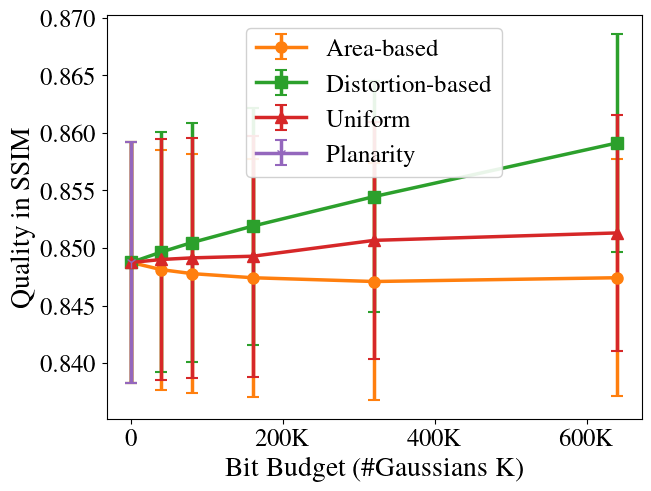


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.3605, std=0.0465, n=33

Processing Area-based:
  Budget 40000: mean=0.3618, std=0.0459, splats=40000
  Budget 80000: mean=0.3616, std=0.0461, splats=80000
  Budget 160000: mean=0.3607, std=0.0467, splats=160000
  Budget 320000: mean=0.3586, std=0.0474, splats=320000
  Budget 640000: mean=0.3545, std=0.0486, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.3611, std=0.0460, splats=40000
  Budget 80000: mean=0.3613, std=0.0460, splats=80000
  Budget 160000: mean=0.3607, std=0.0460, splats=160000
  Budget 320000: mean=0.3593, std=0.0463, splats=320000
  Budget 640000: mean=0.3538, std=0.0463, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.3614, std=0.0474, splats=40000
  Budget 80000: mean=0.3615, std=0.0472, splats=80000
  Budget 160000: mean=0.3619, std=0.0469, splats=160000
  Budget 320000: mean=0.3625, std=0.0472, splats=320000
  Budget 640

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_vs_budget_drjohnson-dw50.png and .eps



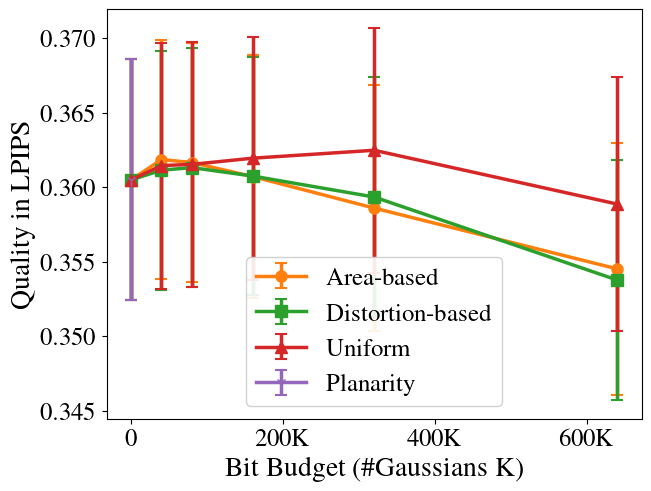


Plotting PSNR
Pure Mesh - PSNR: mean=21.1066, std=1.6186, n=25

Processing Area-based:
  Budget 40000: mean=21.2164, std=1.4252, splats=40000
  Budget 80000: mean=21.2292, std=1.4119, splats=80000
  Budget 160000: mean=21.2409, std=1.4027, splats=160000
  Budget 320000: mean=21.2518, std=1.3980, splats=320000
  Budget 640000: mean=21.2620, std=1.3956, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=21.5879, std=1.5921, splats=40000
  Budget 80000: mean=21.7728, std=1.6358, splats=80000
  Budget 160000: mean=21.9931, std=1.6980, splats=160000
  Budget 320000: mean=22.2706, std=1.7988, splats=320000
  Budget 640000: mean=22.6063, std=1.9350, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=21.1383, std=1.6260, splats=40000
  Budget 80000: mean=21.1452, std=1.6275, splats=80000
  Budget 160000: mean=21.2442, std=1.6506, splats=160000
  Budget 320000: mean=21.3503, std=1.6642, splats=320000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_bicycle-dw50.png and .eps



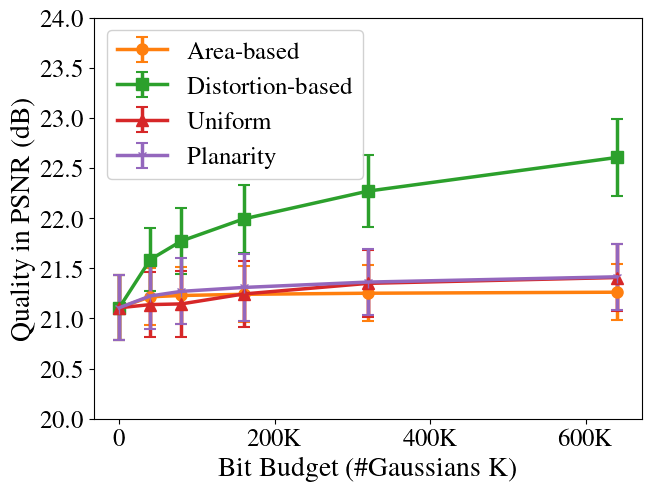


Plotting SSIM
Pure Mesh - SSIM: mean=0.5360, std=0.0642, n=25

Processing Area-based:
  Budget 40000: mean=0.5368, std=0.0635, splats=40000
  Budget 80000: mean=0.5371, std=0.0632, splats=80000
  Budget 160000: mean=0.5376, std=0.0629, splats=160000
  Budget 320000: mean=0.5383, std=0.0625, splats=320000
  Budget 640000: mean=0.5392, std=0.0620, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.5458, std=0.0650, splats=40000
  Budget 80000: mean=0.5524, std=0.0657, splats=80000
  Budget 160000: mean=0.5648, std=0.0671, splats=160000
  Budget 320000: mean=0.5848, std=0.0706, splats=320000
  Budget 640000: mean=0.6106, std=0.0740, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.5380, std=0.0644, splats=40000
  Budget 80000: mean=0.5388, std=0.0643, splats=80000
  Budget 160000: mean=0.5418, std=0.0640, splats=160000
  Budget 320000: mean=0.5505, std=0.0652, splats=320000
  Budget 64000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_bicycle-dw50.png and .eps



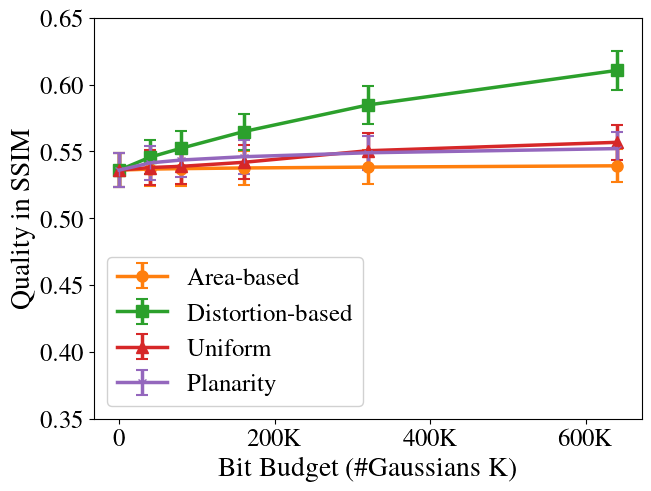


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.4476, std=0.0306, n=25

Processing Area-based:
  Budget 40000: mean=0.4471, std=0.0302, splats=40000
  Budget 80000: mean=0.4469, std=0.0300, splats=80000
  Budget 160000: mean=0.4464, std=0.0297, splats=160000
  Budget 320000: mean=0.4458, std=0.0293, splats=320000
  Budget 640000: mean=0.4446, std=0.0287, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.4462, std=0.0305, splats=40000
  Budget 80000: mean=0.4430, std=0.0304, splats=80000
  Budget 160000: mean=0.4364, std=0.0306, splats=160000
  Budget 320000: mean=0.4192, std=0.0325, splats=320000
  Budget 640000: mean=0.3909, std=0.0350, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.4473, std=0.0302, splats=40000
  Budget 80000: mean=0.4464, std=0.0301, splats=80000
  Budget 160000: mean=0.4484, std=0.0296, splats=160000
  Budget 320000: mean=0.4429, std=0.0287, splats=320000
  Budget 640

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_vs_budget_bicycle-dw50.png and .eps



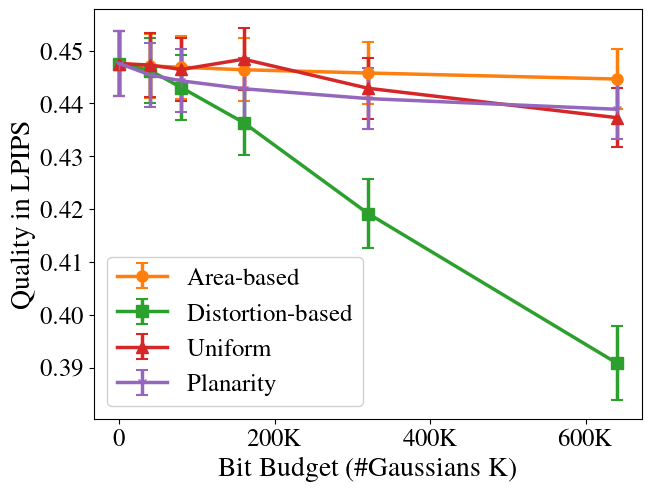


Plotting PSNR
Pure Mesh - PSNR: mean=25.1996, std=0.5873, n=200

Processing Area-based:
  Budget 40000: mean=25.4646, std=0.6472, splats=40000
  Budget 80000: mean=25.7740, std=0.7164, splats=80000
  Budget 160000: mean=26.2145, std=0.8122, splats=160000
  Budget 320000: mean=26.5633, std=0.8703, splats=320000
  Budget 640000: mean=26.6755, std=0.9067, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=25.5531, std=0.6965, splats=40000
  Budget 80000: mean=25.7193, std=0.7635, splats=80000
  Budget 160000: mean=26.0084, std=0.8261, splats=160000
  Budget 320000: mean=26.3314, std=0.8811, splats=320000
  Budget 640000: mean=26.5469, std=0.9139, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=25.7287, std=0.5049, splats=40000
  Budget 80000: mean=26.1382, std=0.6058, splats=80000
  Budget 160000: mean=26.2570, std=0.6217, splats=160000
  Budget 320000: mean=26.3771, std=0.6539, splats=32000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_ficus.png and .eps



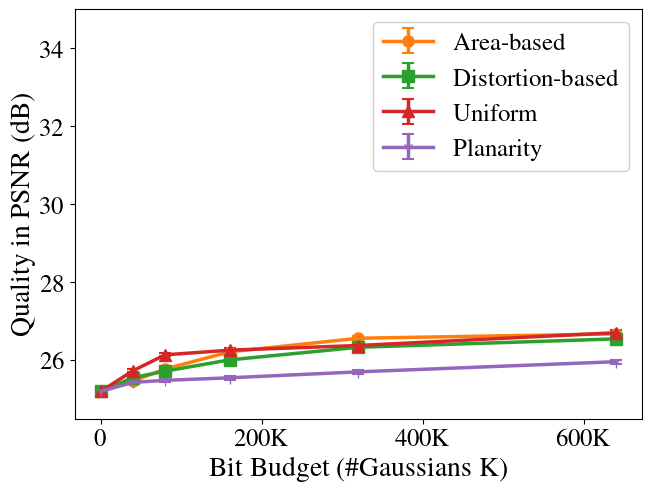


Plotting SSIM
Pure Mesh - SSIM: mean=0.9124, std=0.0060, n=200

Processing Area-based:
  Budget 40000: mean=0.9163, std=0.0078, splats=40000
  Budget 80000: mean=0.9219, std=0.0088, splats=80000
  Budget 160000: mean=0.9300, std=0.0096, splats=160000
  Budget 320000: mean=0.9373, std=0.0098, splats=320000
  Budget 640000: mean=0.9405, std=0.0098, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.9194, std=0.0077, splats=40000
  Budget 80000: mean=0.9233, std=0.0087, splats=80000
  Budget 160000: mean=0.9290, std=0.0096, splats=160000
  Budget 320000: mean=0.9350, std=0.0100, splats=320000
  Budget 640000: mean=0.9389, std=0.0101, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.9201, std=0.0053, splats=40000
  Budget 80000: mean=0.9255, std=0.0072, splats=80000
  Budget 160000: mean=0.9280, std=0.0070, splats=160000
  Budget 320000: mean=0.9321, std=0.0072, splats=320000
  Budget 6400

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_ficus.png and .eps



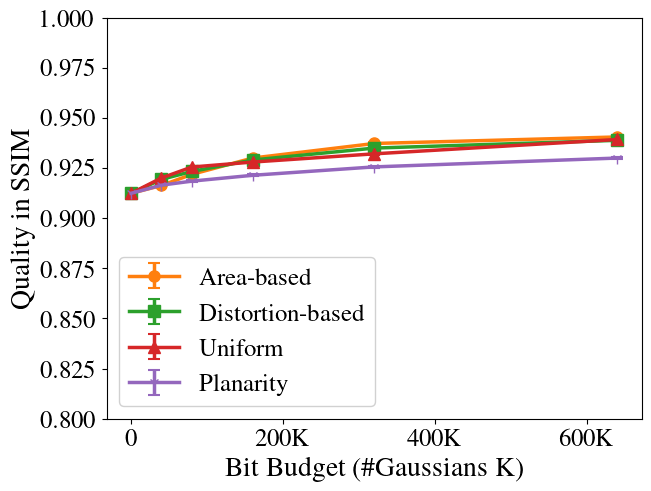


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.0881, std=0.0062, n=200

Processing Area-based:
  Budget 40000: mean=0.0880, std=0.0074, splats=40000
  Budget 80000: mean=0.0859, std=0.0077, splats=80000
  Budget 160000: mean=0.0789, std=0.0083, splats=160000
  Budget 320000: mean=0.0675, std=0.0086, splats=320000
  Budget 640000: mean=0.0592, std=0.0085, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.0855, std=0.0070, splats=40000
  Budget 80000: mean=0.0821, std=0.0073, splats=80000
  Budget 160000: mean=0.0749, std=0.0079, splats=160000
  Budget 320000: mean=0.0662, std=0.0084, splats=320000
  Budget 640000: mean=0.0602, std=0.0084, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.0900, std=0.0067, splats=40000
  Budget 80000: mean=0.0885, std=0.0075, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=n

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_vs_budget_ficus.png and .eps



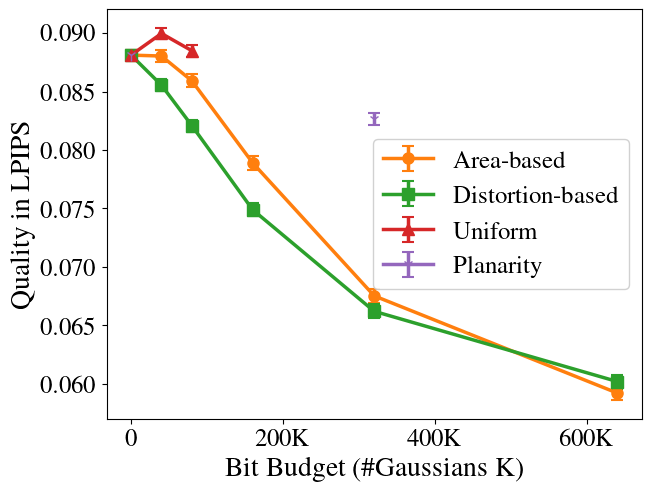


Plotting PSNR
Pure Mesh - PSNR: mean=28.9337, std=1.5587, n=200

Processing Area-based:
  Budget 40000: mean=29.8391, std=1.5771, splats=40000
  Budget 80000: mean=30.8810, std=1.6597, splats=80000
  Budget 160000: mean=32.5369, std=2.0155, splats=160000
  Budget 320000: mean=34.1650, std=2.6810, splats=320000
  Budget 640000: mean=34.8939, std=3.1076, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=30.7906, std=1.5475, splats=40000
  Budget 80000: mean=31.8997, std=1.8147, splats=80000
  Budget 160000: mean=33.2167, std=2.3615, splats=160000
  Budget 320000: mean=34.1907, std=2.8760, splats=320000
  Budget 640000: mean=34.7474, std=3.1299, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=30.2968, std=1.7358, splats=40000
  Budget 80000: mean=31.0009, std=1.9148, splats=80000
  Budget 160000: mean=31.6947, std=2.1421, splats=160000
  Budget 320000: mean=32.8689, std=2.1580, splats=32000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_hotdog.png and .eps



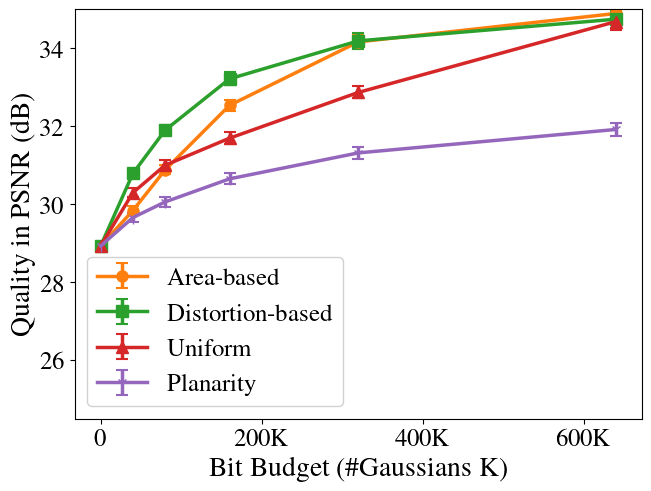


Plotting SSIM
Pure Mesh - SSIM: mean=0.9528, std=0.0064, n=200

Processing Area-based:
  Budget 40000: mean=0.9555, std=0.0069, splats=40000
  Budget 80000: mean=0.9606, std=0.0066, splats=80000
  Budget 160000: mean=0.9687, std=0.0050, splats=160000
  Budget 320000: mean=0.9773, std=0.0035, splats=320000
  Budget 640000: mean=0.9820, std=0.0040, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.9603, std=0.0063, splats=40000
  Budget 80000: mean=0.9652, std=0.0049, splats=80000
  Budget 160000: mean=0.9719, std=0.0036, splats=160000
  Budget 320000: mean=0.9772, std=0.0044, splats=320000
  Budget 640000: mean=0.9804, std=0.0049, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.9612, std=0.0053, splats=40000
  Budget 80000: mean=0.9653, std=0.0050, splats=80000
  Budget 160000: mean=0.9675, std=0.0054, splats=160000
  Budget 320000: mean=0.9730, std=0.0039, splats=320000
  Budget 6400

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_hotdog.png and .eps



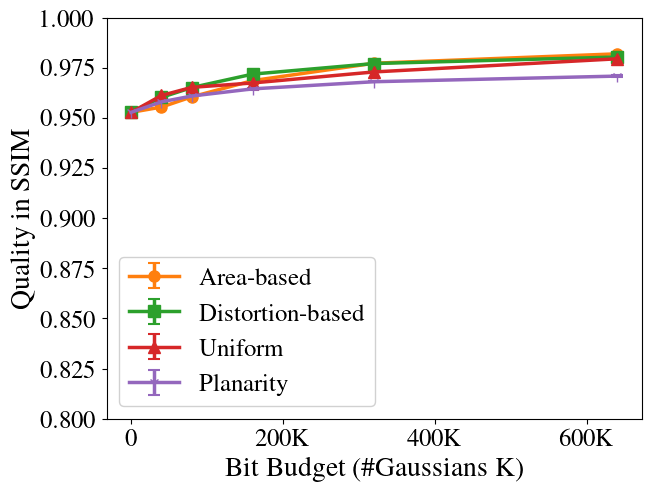


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.0716, std=0.0124, n=200

Processing Area-based:
  Budget 40000: mean=0.0777, std=0.0175, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=0.0418, std=0.0066, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=0.0404, std=0.0090, splats=640000
  Plotting 6 points for Uni

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_vs_budget_hotdog.png and .eps



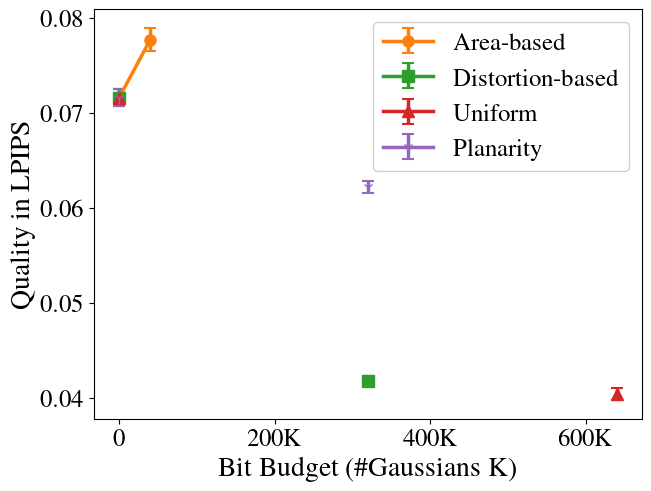


Plotting PSNR
Pure Mesh - PSNR: mean=25.3864, std=1.2767, n=200

Processing Area-based:
  Budget 40000: mean=26.2572, std=1.2466, splats=40000
  Budget 80000: mean=26.6060, std=1.3112, splats=80000
  Budget 160000: mean=27.2657, std=1.3853, splats=160000
  Budget 320000: mean=28.6604, std=1.5407, splats=320000
  Budget 640000: mean=30.6245, std=1.8471, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=27.2065, std=1.4368, splats=40000
  Budget 80000: mean=27.8506, std=1.4948, splats=80000
  Budget 160000: mean=28.5463, std=1.6455, splats=160000
  Budget 320000: mean=29.4416, std=1.7894, splats=320000
  Budget 640000: mean=30.2412, std=1.9321, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=26.1978, std=1.3996, splats=40000
  Budget 80000: mean=26.5980, std=1.5885, splats=80000
  Budget 160000: mean=27.9698, std=1.5585, splats=160000
  Budget 320000: mean=28.4245, std=1.7717, splats=32000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_lego.png and .eps



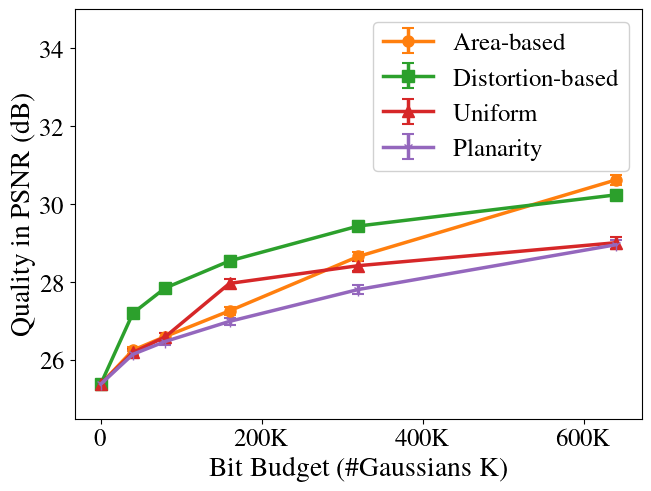


Plotting SSIM
Pure Mesh - SSIM: mean=0.9057, std=0.0095, n=200

Processing Area-based:
  Budget 40000: mean=0.9102, std=0.0093, splats=40000
  Budget 80000: mean=0.9149, std=0.0095, splats=80000
  Budget 160000: mean=0.9251, std=0.0094, splats=160000
  Budget 320000: mean=0.9418, std=0.0088, splats=320000
  Budget 640000: mean=0.9591, std=0.0082, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.9235, std=0.0080, splats=40000
  Budget 80000: mean=0.9314, std=0.0085, splats=80000
  Budget 160000: mean=0.9408, std=0.0088, splats=160000
  Budget 320000: mean=0.9503, std=0.0091, splats=320000
  Budget 640000: mean=0.9580, std=0.0093, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.9153, std=0.0094, splats=40000
  Budget 80000: mean=0.9211, std=0.0110, splats=80000
  Budget 160000: mean=0.9332, std=0.0080, splats=160000
  Budget 320000: mean=0.9383, std=0.0103, splats=320000
  Budget 6400

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_lego.png and .eps



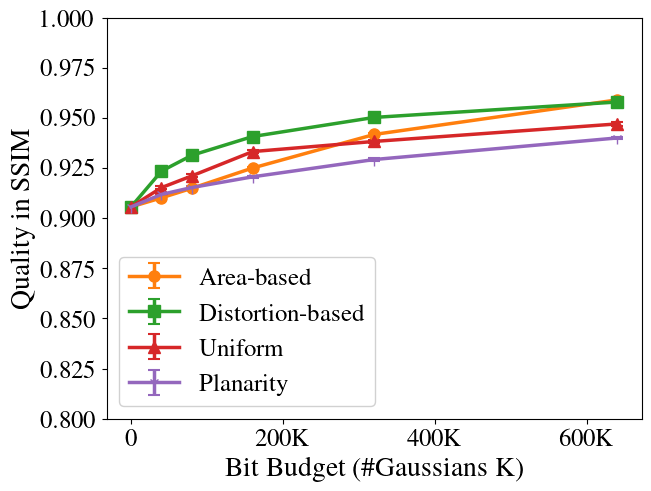


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.1008, std=0.0104, n=200

Processing Area-based:
  Budget 40000: mean=0.0998, std=0.0106, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.0961, std=0.0104, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=0.1006, std=0.0109, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Uni

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_vs_budget_lego.png and .eps



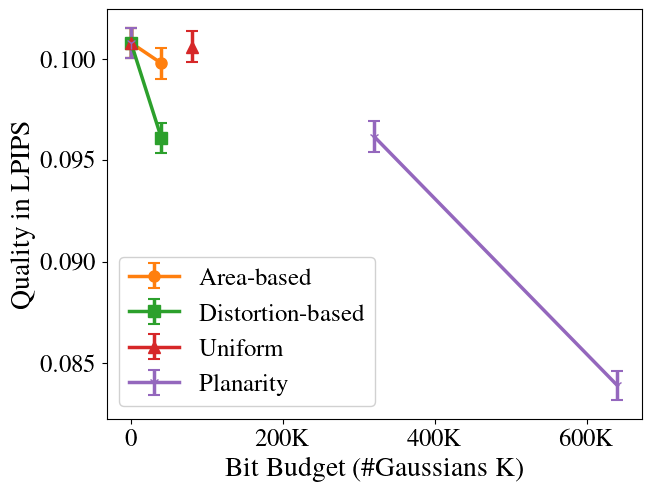


Plotting PSNR
Pure Mesh - PSNR: mean=25.0636, std=0.9433, n=200

Processing Area-based:
  Budget 40000: mean=26.4295, std=1.0011, splats=40000
  Budget 80000: mean=27.1015, std=1.0105, splats=80000
  Budget 160000: mean=27.9627, std=1.1076, splats=160000
  Budget 320000: mean=28.7607, std=1.2701, splats=320000
  Budget 640000: mean=29.3125, std=1.3510, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=27.1448, std=1.0943, splats=40000
  Budget 80000: mean=27.6484, std=1.1092, splats=80000
  Budget 160000: mean=28.1565, std=1.1400, splats=160000
  Budget 320000: mean=28.6031, std=1.2002, splats=320000
  Budget 640000: mean=28.8887, std=1.2531, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=26.7358, std=0.8150, splats=40000
  Budget 80000: mean=27.0708, std=0.7751, splats=80000
  Budget 160000: mean=27.7272, std=0.9482, splats=160000
  Budget 320000: mean=29.1427, std=1.2244, splats=32000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_mic.png and .eps



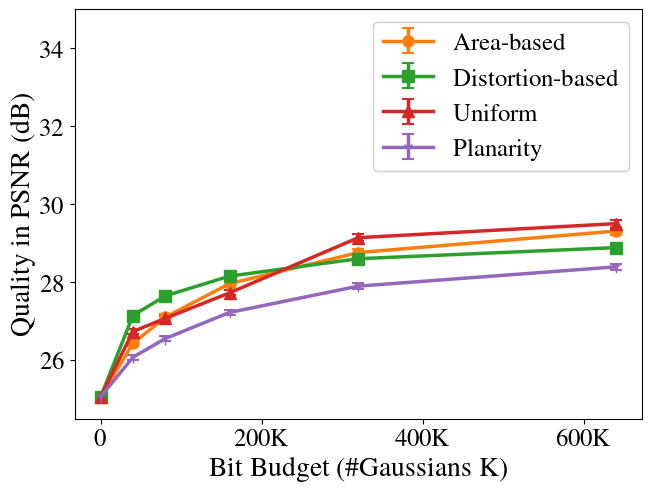


Plotting SSIM
Pure Mesh - SSIM: mean=0.9045, std=0.0152, n=200

Processing Area-based:
  Budget 40000: mean=0.9325, std=0.0071, splats=40000
  Budget 80000: mean=0.9406, std=0.0065, splats=80000
  Budget 160000: mean=0.9520, std=0.0063, splats=160000
  Budget 320000: mean=0.9619, std=0.0066, splats=320000
  Budget 640000: mean=0.9666, std=0.0066, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.9281, std=0.0098, splats=40000
  Budget 80000: mean=0.9410, std=0.0073, splats=80000
  Budget 160000: mean=0.9528, std=0.0066, splats=160000
  Budget 320000: mean=0.9595, std=0.0063, splats=320000
  Budget 640000: mean=0.9635, std=0.0063, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.9253, std=0.0107, splats=40000
  Budget 80000: mean=0.9298, std=0.0082, splats=80000
  Budget 160000: mean=0.9423, std=0.0062, splats=160000
  Budget 320000: mean=0.9546, std=0.0069, splats=320000
  Budget 6400

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_mic.png and .eps



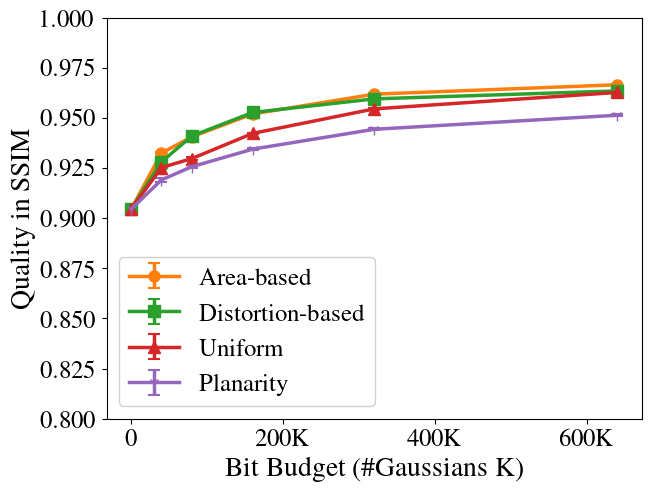


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.0903, std=0.0108, n=200

Processing Area-based:
  Budget 40000: mean=0.0828, std=0.0081, splats=40000
  Budget 80000: mean=0.0783, std=0.0085, splats=80000
  Budget 160000: mean=0.0647, std=0.0077, splats=160000
  Budget 320000: mean=0.0471, std=0.0071, splats=320000
  Budget 640000: mean=0.0383, std=0.0077, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.0779, std=0.0085, splats=40000
  Budget 80000: mean=0.0678, std=0.0078, splats=80000
  Budget 160000: mean=0.0557, std=0.0081, splats=160000
  Budget 320000: mean=0.0468, std=0.0079, splats=320000
  Budget 640000: mean=0.0419, std=0.0078, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=0.0432, std=0

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_vs_budget_mic.png and .eps



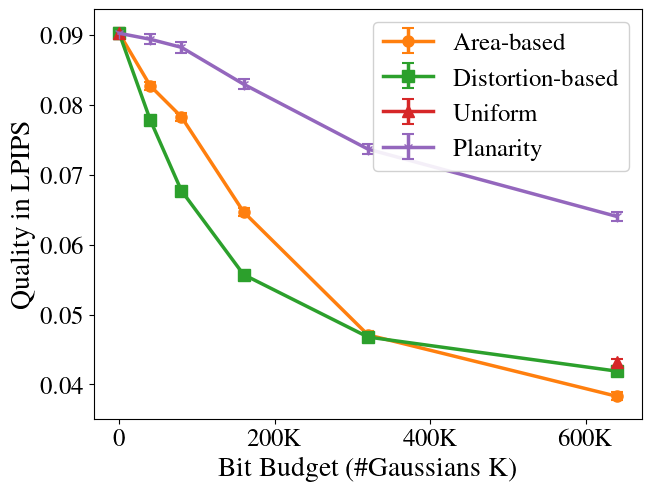


Plotting PSNR
Pure Mesh - PSNR: mean=24.9541, std=0.7644, n=200

Processing Area-based:
  Budget 40000: mean=25.4461, std=0.7005, splats=40000
  Budget 80000: mean=25.8233, std=0.6669, splats=80000
  Budget 160000: mean=26.5014, std=0.7119, splats=160000
  Budget 320000: mean=27.4109, std=0.8737, splats=320000
  Budget 640000: mean=28.0784, std=1.0219, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=26.1011, std=0.5897, splats=40000
  Budget 80000: mean=26.5212, std=0.7107, splats=80000
  Budget 160000: mean=27.0026, std=0.8472, splats=160000
  Budget 320000: mean=27.5293, std=0.9847, splats=320000
  Budget 640000: mean=28.0107, std=1.0940, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=25.4912, std=0.7276, splats=40000
  Budget 80000: mean=26.0101, std=0.6636, splats=80000
  Budget 160000: mean=26.2219, std=0.7070, splats=160000
  Budget 320000: mean=26.8025, std=0.8677, splats=32000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_ship.png and .eps



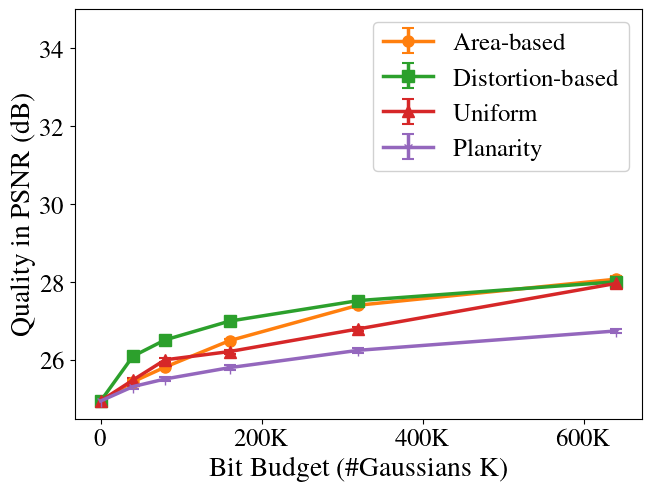


Plotting SSIM
Pure Mesh - SSIM: mean=0.8163, std=0.0390, n=200

Processing Area-based:
  Budget 40000: mean=0.8218, std=0.0365, splats=40000
  Budget 80000: mean=0.8285, std=0.0353, splats=80000
  Budget 160000: mean=0.8405, std=0.0339, splats=160000
  Budget 320000: mean=0.8568, std=0.0318, splats=320000
  Budget 640000: mean=0.8695, std=0.0301, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=0.8343, std=0.0340, splats=40000
  Budget 80000: mean=0.8419, std=0.0317, splats=80000
  Budget 160000: mean=0.8511, std=0.0295, splats=160000
  Budget 320000: mean=0.8605, std=0.0282, splats=320000
  Budget 640000: mean=0.8673, std=0.0283, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.8275, std=0.0373, splats=40000
  Budget 80000: mean=0.8361, std=0.0354, splats=80000
  Budget 160000: mean=0.8393, std=0.0352, splats=160000
  Budget 320000: mean=0.8499, std=0.0341, splats=320000
  Budget 6400

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_ship.png and .eps



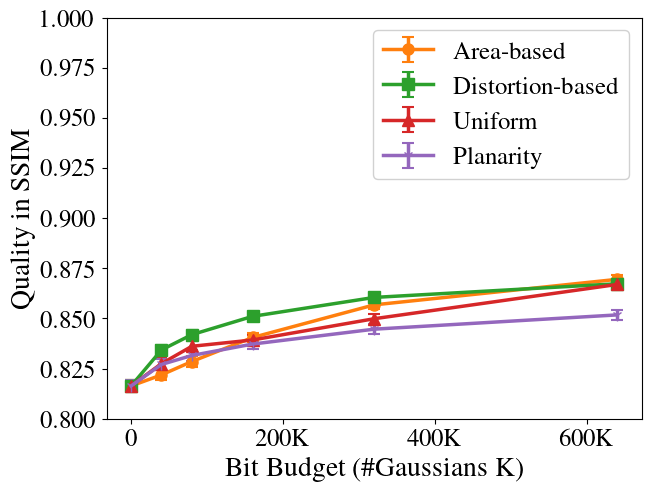


Plotting LPIPS
Pure Mesh - LPIPS: mean=0.2113, std=0.0339, n=200

Processing Area-based:
  Budget 40000: mean=0.2013, std=0.0267, splats=40000
  Budget 80000: mean=0.1910, std=0.0247, splats=80000
  Budget 160000: mean=0.1754, std=0.0224, splats=160000
  Budget 320000: mean=0.1546, std=0.0217, splats=320000
  Budget 640000: mean=0.1347, std=0.0219, splats=640000
  Plotting 6 points for Area-based

Processing Distortion-based:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Distortion-based

Processing Uniform:
  Budget 40000: mean=0.2034, std=0.0325, splats=40000
  Budget 80000: mean=0.1943, std=0.0297, splats=80000
  Budget 160000: mean=0.1835, std=0.0291, splats=160000
  Budget 320000: mean=0.1707, std=0.0291, splats=320000
  Budget 640000: mean=0.1418, std=0.0222,

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_vs_budget_ship.png and .eps



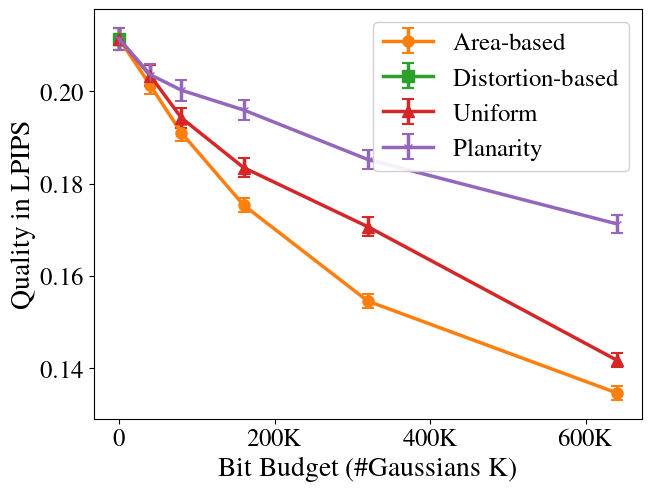

In [23]:

def budget_policy_curves():
    """
    Plot metrics vs budget for different budgeting policies.
    """
    ITERATION = 'ours_15000'
    MESH_ITERATION = 'ours_1'
    
    input_dir = Path('./data') / SCENE_NAME
    output_dir = Path('./plots') / 'budget_policy_curves' / SCENE_NAME
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define policies with their configurations
    policies = [
        {'name': 'area', 'label': 'Area-based', 'marker': 'o', 'color': color_palette[1]},
        {'name': 'distortion', 'label': 'Distortion-based', 'marker': 's', 'color': color_palette[2]},
        {'name': 'uniform', 'label': 'Uniform', 'marker': '^', 'color': color_palette[3]},
        {'name': 'planarity2', 'label': 'Planarity', 'marker': '1', 'color': color_palette[4]},
        # {'name': 'mixed_v1g3', 'label': 'Mixed vis1:geo3', 'marker': '1', 'color': color_palette[4]},
        # {'name': 'mixed_v2g2', 'label': 'Mixed vis1:geo1', 'marker': '2', 'color': color_palette[5]},
        # {'name': 'mixed_v3g1', 'label': 'Mixed vis3:geo1', 'marker': '3', 'color': color_palette[6]},
    ]
    
    budgets = [40000, 80000, 160000, 320000, 640000]
    
    metrics = {
        'PSNR': {'ylabel': 'PSNR (dB)', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'},
    }
    
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting {metric_key}")
        print(f"{'='*60}")
        
        # 1. Get Pure mesh baseline
        mesh_mean = None
        mesh_stderr = None
        
        mesh_file = input_dir / 'area_1_occlusion' / 'per_view_gs_mesh.json'
        if mesh_file.exists():
            with open(mesh_file, 'r') as f:
                data = json.load(f)
            
            iter_key = MESH_ITERATION if MESH_ITERATION in data else ITERATION
            
            if iter_key in data:
                metric_data = data[iter_key][metric_key]
                if isinstance(metric_data, dict):
                    values = [v for v in metric_data.values() if v != -1.0]
                else:
                    values = [metric_data]
                
                mesh_mean = np.mean(values)
                std_val = np.std(values)
                mesh_stderr = std_val / np.sqrt(len(values))
                print(f"Pure Mesh - {metric_key}: mean={mesh_mean:.4f}, std={std_val:.4f}, n={len(values)}")
        
        # 2. Process each policy
        for policy in policies:
            policy_name = policy['name']
            xs = []
            ys = []
            errs = []
            
            # Add pure mesh point at budget=0
            if mesh_mean is not None:
                xs.append(0)
                ys.append(mesh_mean)
                errs.append(mesh_stderr)
            
            print(f"\nProcessing {policy['label']}:")
            for budget in budgets:
                policy_file = input_dir / f"{policy_name}_{budget}_occlusion" / 'per_view_gs_mesh.json'
                
                if policy_file.exists():
                    with open(policy_file, 'r') as f:
                        data = json.load(f)
                    
                    if ITERATION in data:
                        metric_data = data[ITERATION][metric_key]
                        if isinstance(metric_data, dict):
                            values = [v for v in metric_data.values() if v != -1.0]
                        else:
                            values = [metric_data]
                        
                        mean_val = np.mean(values)
                        std_val = np.std(values)
                        stderr = std_val / np.sqrt(len(values))
                        num_splats = data[ITERATION].get('num_splats', budget)
                        
                        xs.append(num_splats)
                        ys.append(mean_val)
                        errs.append(stderr)
                        
                        print(f"  Budget {budget}: mean={mean_val:.4f}, std={std_val:.4f}, splats={num_splats}")
            
            # Plot this policy
            if xs:
                print(f"  Plotting {len(xs)} points for {policy['label']}")
                ax.errorbar(xs, ys, yerr=errs,
                           marker=policy['marker'], markersize=8, linewidth=2.5,
                           capsize=err_capsize, capthick=err_capthick,
                           color=policy['color'], label=policy['label'], zorder=2)
            else:
                print(f"  No data to plot for {policy['label']}!")
        
        # Formatting
        ax.set_xlabel('Bit Budget (\#Gaussians K)', fontsize=20)
        ax.set_ylabel(f"Quality in {metric_info['ylabel']}", fontsize=20)
        
        set_metric_ylim_fig(ax, metric_key, SCENE_NAME)
        
        # Format x-axis to show values in K (thousands)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x > 0 else '0'))
        
        
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        base_name = f'{metric_key}_vs_budget_{SCENE_NAME}'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()



# [TODO] [NOTE] fix y-axis range to enable comparison across plots
# the exact ranges for each set of figures might differ

# SCENE_NAME = 'drjohnson-dw50'
# budget_policy_curves()


for name in SCENE_NAME_LIST:
    SCENE_NAME = name
    budget_policy_curves()

## Figure Delta (DTGS - Pure Mesh)


Computing Average Delta for PSNR

Processing budget: 40000
  ficus area: baseline=25.1996, policy=25.4646, delta=0.2649
  ficus distortion: baseline=25.1996, policy=25.5531, delta=0.3535
  ficus uniform: baseline=25.1996, policy=25.7287, delta=0.5291
  ficus planarity2: baseline=25.1996, policy=25.4323, delta=0.2327
  hotdog area: baseline=28.9337, policy=29.8391, delta=0.9055
  hotdog distortion: baseline=28.9337, policy=30.7906, delta=1.8569
  hotdog uniform: baseline=28.9337, policy=30.2968, delta=1.3632
  hotdog planarity2: baseline=28.9337, policy=29.6588, delta=0.7251
  lego area: baseline=25.3864, policy=26.2572, delta=0.8708
  lego distortion: baseline=25.3864, policy=27.2065, delta=1.8202
  lego uniform: baseline=25.3864, policy=26.1978, delta=0.8114
  lego planarity2: baseline=25.3864, policy=26.1514, delta=0.7650
  mic area: baseline=25.0636, policy=26.4295, delta=1.3659
  mic distortion: baseline=25.0636, policy=27.1448, delta=2.0813
  mic uniform: baseline=25.0636, policy

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



[INFO] Saved: PSNR_delta_vs_budget_average.png and .eps



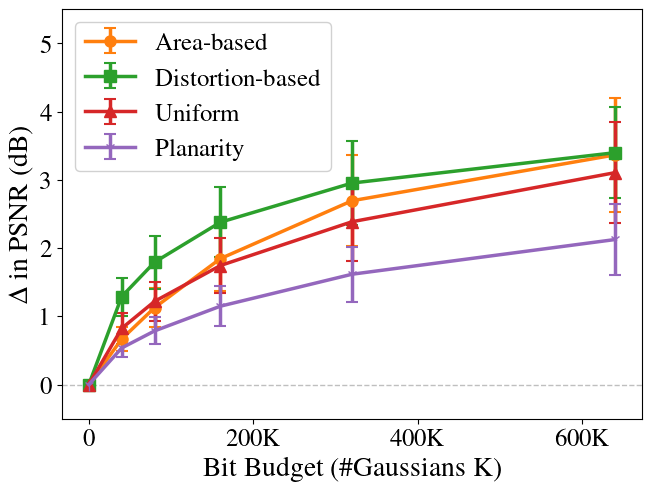


Computing Average Delta for SSIM

Processing budget: 40000
  ficus area: baseline=0.9124, policy=0.9163, delta=0.0039
  ficus distortion: baseline=0.9124, policy=0.9194, delta=0.0069
  ficus uniform: baseline=0.9124, policy=0.9201, delta=0.0077
  ficus planarity2: baseline=0.9124, policy=0.9165, delta=0.0041
  hotdog area: baseline=0.9528, policy=0.9555, delta=0.0026
  hotdog distortion: baseline=0.9528, policy=0.9603, delta=0.0075
  hotdog uniform: baseline=0.9528, policy=0.9612, delta=0.0084
  hotdog planarity2: baseline=0.9528, policy=0.9581, delta=0.0053
  lego area: baseline=0.9057, policy=0.9102, delta=0.0045
  lego distortion: baseline=0.9057, policy=0.9235, delta=0.0178
  lego uniform: baseline=0.9057, policy=0.9153, delta=0.0096
  lego planarity2: baseline=0.9057, policy=0.9119, delta=0.0062
  mic area: baseline=0.9045, policy=0.9325, delta=0.0280
  mic distortion: baseline=0.9045, policy=0.9281, delta=0.0236
  mic uniform: baseline=0.9045, policy=0.9253, delta=0.0208
  mic p

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



[INFO] Saved: SSIM_delta_vs_budget_average.png and .eps



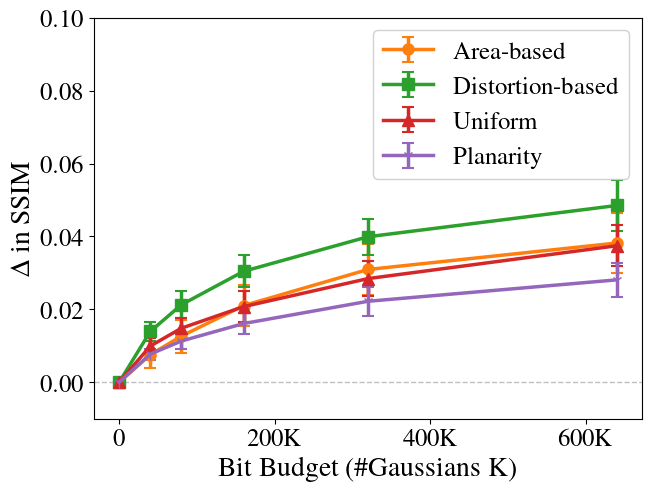


Computing Average Delta for LPIPS

Processing budget: 40000
  ficus area: baseline=0.0881, policy=0.0880, delta=-0.0001
  ficus distortion: baseline=0.0881, policy=0.0855, delta=-0.0026
  ficus uniform: baseline=0.0881, policy=0.0900, delta=0.0019
  ficus planarity2: baseline=0.0881, policy=nan, delta=nan
  hotdog area: baseline=0.0716, policy=0.0777, delta=0.0061
  hotdog distortion: baseline=0.0716, policy=nan, delta=nan
  hotdog uniform: baseline=0.0716, policy=nan, delta=nan
  hotdog planarity2: baseline=0.0716, policy=nan, delta=nan
  lego area: baseline=0.1008, policy=0.0998, delta=-0.0010
  lego distortion: baseline=0.1008, policy=0.0961, delta=-0.0047
  lego uniform: baseline=0.1008, policy=nan, delta=nan
  lego planarity2: baseline=0.1008, policy=nan, delta=nan
  mic area: baseline=0.0903, policy=0.0828, delta=-0.0075
  mic distortion: baseline=0.0903, policy=0.0779, delta=-0.0124
  mic uniform: baseline=0.0903, policy=nan, delta=nan
  mic planarity2: baseline=0.0903, policy=

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


  lego planarity2: baseline=0.1008, policy=0.0962, delta=-0.0046
  mic area: baseline=0.0903, policy=0.0471, delta=-0.0432
  mic distortion: baseline=0.0903, policy=0.0468, delta=-0.0435
  mic uniform: baseline=0.0903, policy=nan, delta=nan
  mic planarity2: baseline=0.0903, policy=0.0737, delta=-0.0166
  ship area: baseline=0.2113, policy=0.1546, delta=-0.0568
  ship distortion: baseline=0.2113, policy=nan, delta=nan
  ship uniform: baseline=0.2113, policy=0.1707, delta=-0.0407
  ship planarity2: baseline=0.2113, policy=0.1852, delta=-0.0261
  bicycle-dw50 area: baseline=0.4476, policy=0.4458, delta=-0.0018
  bicycle-dw50 distortion: baseline=0.4476, policy=0.4192, delta=-0.0284
  bicycle-dw50 uniform: baseline=0.4476, policy=0.4429, delta=-0.0047
  bicycle-dw50 planarity2: baseline=0.4476, policy=0.4409, delta=-0.0066
  area average: mean=nan, std=nan, n=6
  distortion average: mean=nan, std=nan, n=6
  uniform average: mean=nan, std=nan, n=6
  planarity2 average: mean=-0.0115, std=0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



[INFO] Saved: LPIPS_delta_vs_budget_average.png and .eps



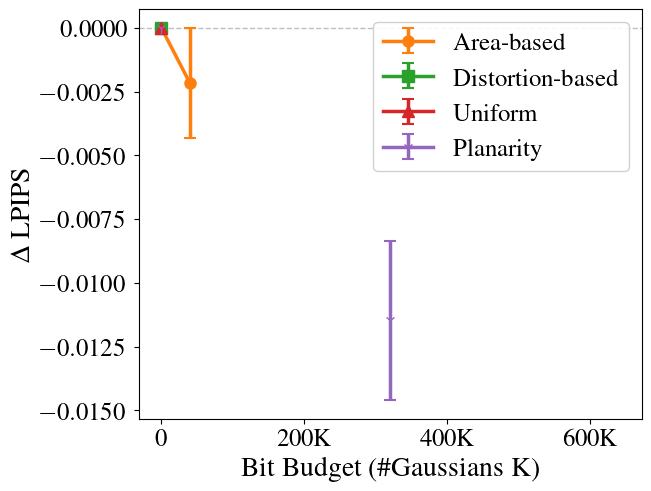

In [ ]:

def policy_budget_delta_curves():
    """
    Plot average delta (improvement over pure mesh) across all scenes.
    
    Average across all nerf-synthetic scenes 
    (the 5 scenes we used are ficus, hotdog, lego, mic, ship)
    x-axis: budget number (0, 40k, 80k, 160k, 320k, 640k)
    y-axis: delta of quality in PSNR/SSIM/LPIPS (compared to pure mesh baseline)
    hue: different budgeting policies
    """
    ITERATION = 'ours_15000'
    MESH_ITERATION = 'ours_1'
    
    budgets = [40000, 80000, 160000, 320000, 640000]
    
    # Define policies with their configurations
    policies = [
        {'name': 'area', 'label': 'Area-based', 'marker': 'o', 'color': color_palette[1]},
        {'name': 'distortion', 'label': 'Distortion-based', 'marker': 's', 'color': color_palette[2]},
        {'name': 'uniform', 'label': 'Uniform', 'marker': '^', 'color': color_palette[3]},
        {'name': 'planarity2', 'label': 'Planarity', 'marker': '1', 'color': color_palette[4]},
        # {'name': 'mixed_v1g3', 'label': 'Mixed vis1:geo3', 'marker': '1', 'color': color_palette[4]},
        # {'name': 'mixed_v2g2', 'label': 'Mixed vis1:geo1', 'marker': '2', 'color': color_palette[5]},
        # {'name': 'mixed_v3g1', 'label': 'Mixed vis3:geo1', 'marker': '3', 'color': color_palette[6]},
    ]
    
    input_base = Path('./data')
    output_dir = Path('./plots') / 'budget_policy_delta_curves'
    output_dir.mkdir(parents=True, exist_ok=True)
    
    metrics = {
        'PSNR': {'ylabel': r'$\Delta$ in PSNR (dB)', 'title': 'PSNR Improvement'},
        'SSIM': {'ylabel': r'$\Delta$ in SSIM', 'title': 'SSIM Improvement'},
        'LPIPS': {'ylabel': r'$\Delta$ LPIPS', 'title': 'LPIPS Improvement'}
    }
    
    # For each metric, create one plot
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Computing Average Delta for {metric_key}")
        print(f"{'='*60}")
        
        # Store data for each policy
        policy_data = {p['name']: {'xs': [], 'ys': [], 'errs': []} for p in policies}
        
        # For each budget level
        for budget in budgets:
            print(f"\nProcessing budget: {budget}")
            
            # Collect deltas for each policy across all scenes
            policy_deltas = {p['name']: [] for p in policies}
            
            for scene in SCENE_NAME_LIST:
                scene_dir = input_base / scene
                
                # Get pure mesh baseline for this scene
                mesh_file = scene_dir / 'area_1_occlusion' / 'per_view_gs_mesh.json'
                
                if not mesh_file.exists():
                    print(f"  [WARN] Missing mesh file for {scene}")
                    continue
                
                with open(mesh_file, 'r') as f:
                    mesh_data = json.load(f)
                
                iter_key = MESH_ITERATION if MESH_ITERATION in mesh_data else ITERATION
                
                if iter_key not in mesh_data:
                    print(f"  [WARN] No iteration key found in mesh file for {scene}")
                    continue
                
                # Get baseline metric value
                mesh_metric = mesh_data[iter_key][metric_key]
                if isinstance(mesh_metric, dict):
                    mesh_values = [v for v in mesh_metric.values() if v != -1.0]
                    baseline = np.mean(mesh_values)
                else:
                    baseline = mesh_metric
                
                # For each policy, compute delta
                for policy in policies:
                    policy_name = policy['name']
                    policy_file = scene_dir / f'{policy_name}_{budget}_occlusion' / 'per_view_gs_mesh.json'
                    
                    if not policy_file.exists():
                        print(f"  [WARN] Missing {policy_name} file for {scene} at budget {budget}")
                        continue
                    
                    with open(policy_file, 'r') as f:
                        policy_file_data = json.load(f)
                    
                    if ITERATION not in policy_file_data:
                        print(f"  [WARN] No {ITERATION} in {policy_name} file for {scene}")
                        continue
                    
                    # Get policy metric value
                    policy_metric = policy_file_data[ITERATION][metric_key]
                    if isinstance(policy_metric, dict):
                        policy_values = [v for v in policy_metric.values() if v != -1.0]
                        policy_val = np.mean(policy_values)
                    else:
                        policy_val = policy_metric
                    
                    # Compute delta (improvement over baseline)
                    # For LPIPS, lower is better
                    delta = policy_val - baseline  # Positive = improvement
                    
                    policy_deltas[policy_name].append(delta)
                    print(f"  {scene} {policy_name}: baseline={baseline:.4f}, policy={policy_val:.4f}, delta={delta:.4f}")
            
            # Compute average delta and standard error across scenes
            for policy in policies:
                policy_name = policy['name']
                if len(policy_deltas[policy_name]) > 0:
                    deltas = np.array(policy_deltas[policy_name])
                    mean_delta = np.mean(deltas)
                    std_delta = np.std(deltas)
                    stderr_delta = std_delta / np.sqrt(len(deltas))
                    
                    policy_data[policy_name]['xs'].append(budget)
                    policy_data[policy_name]['ys'].append(mean_delta)
                    policy_data[policy_name]['errs'].append(stderr_delta)
                    
                    print(f"  {policy_name} average: mean={mean_delta:.4f}, std={std_delta:.4f}, n={len(deltas)}")
        
        # Add budget=0 point (delta=0 by definition)
        for policy in policies:
            policy_name = policy['name']
            if len(policy_data[policy_name]['xs']) > 0:
                policy_data[policy_name]['xs'].insert(0, 0)
                policy_data[policy_name]['ys'].insert(0, 0.0)
                policy_data[policy_name]['errs'].insert(0, 0.0)
        
        # Plot each policy
        for policy in policies:
            policy_name = policy['name']
            if len(policy_data[policy_name]['xs']) > 0:
                ax.errorbar(
                    policy_data[policy_name]['xs'], 
                    policy_data[policy_name]['ys'], 
                    yerr=policy_data[policy_name]['errs'],
                    marker=policy['marker'], 
                    markersize=8, 
                    linewidth=2.5,
                    capsize=err_capsize, 
                    capthick=err_capthick,
                    color=policy['color'], 
                    label=policy['label'], 
                    zorder=2
                )
                print(f"\n[INFO] Plotted {len(policy_data[policy_name]['xs'])} points for {policy['label']}")
        
        # Add horizontal line at y=0 (no improvement)
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
        
        # Formatting
        ax.set_xlabel('Bit Budget (\#Gaussians K)', fontsize=20)
        ax.set_ylabel(metric_info['ylabel'], fontsize=20)
        
        # Set fixed y-axis range
        set_metric_ylim_delta(ax, metric_key)
        
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x > 0 else '0'))
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        # Save both formats
        base_name = f'{metric_key}_delta_vs_budget_average'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\n[INFO] Saved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()




policy_budget_delta_curves()


## Figure Iter


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=27.5558, std=1.7082, n=33
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=27.6041, std=1.7199, n=33
    Iter 2000: mean=27.6141, std=1.7251, n=33
    Iter 3000: mean=27.6409, std=1.7299, n=33
    Iter 4000: mean=27.6652, std=1.7350, n=33
    Iter 5000: mean=27.6769, std=1.7426, n=33
    Iter 6000: mean=27.6784, std=1.7473, n=33
    Iter 7000: mean=27.6782, std=1.7503, n=33
    Iter 10000: mean=27.6790, std=1.7524, n=33
    Iter 12000: mean=27.6835, std=1.7605, n=33
    Iter 15000: mean=27.6838, std=1.7615, n=33
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=27.6372, std=1.7193, n=33
    Iter 2000: mean=27.6556, std=1.7233, n=33
    Iter 3000: mean=27.6978, std=1.7275, n=33
    Iter 4000: mean=27.7366, std=1.7345, n=3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_drjohnson-dw50_distortion.png and .eps



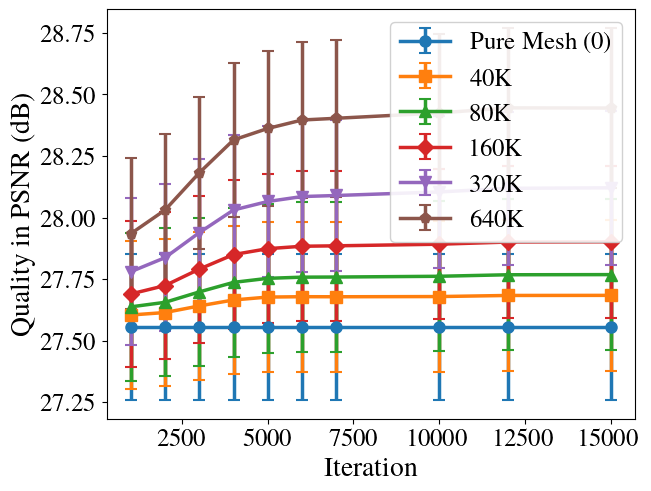


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.8487, std=0.0602, n=33
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.8494, std=0.0601, n=33
    Iter 2000: mean=0.8494, std=0.0601, n=33
    Iter 3000: mean=0.8496, std=0.0601, n=33
    Iter 4000: mean=0.8498, std=0.0601, n=33
    Iter 5000: mean=0.8498, std=0.0601, n=33
    Iter 6000: mean=0.8498, std=0.0601, n=33
    Iter 7000: mean=0.8498, std=0.0601, n=33
    Iter 10000: mean=0.8497, std=0.0601, n=33
    Iter 12000: mean=0.8497, std=0.0600, n=33
    Iter 15000: mean=0.8497, std=0.0600, n=33
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.8499, std=0.0598, n=33
    Iter 2000: mean=0.8500, std=0.0598, n=33
    Iter 3000: mean=0.8504, std=0.0598, n=33
    Iter 4000: mean=0.8506, std=0.0598, n=33
    Iter 5000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_drjohnson-dw50_distortion.png and .eps



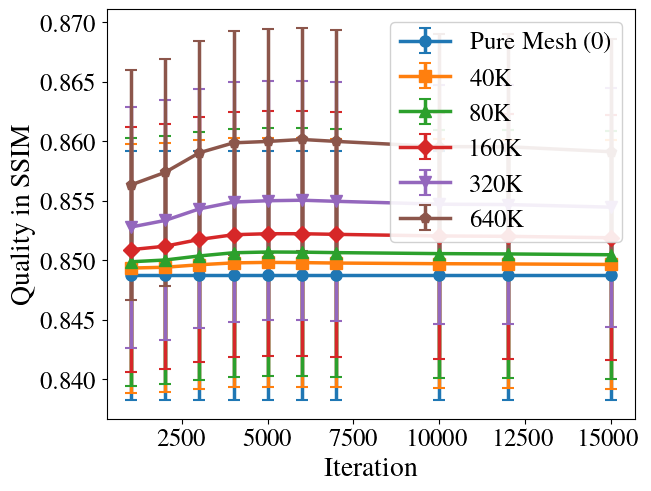


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=21.1066, std=1.6186, n=25
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=21.1591, std=1.5798, n=25
    Iter 2000: mean=21.1974, std=1.5457, n=25
    Iter 3000: mean=21.2901, std=1.5445, n=25
    Iter 4000: mean=21.3989, std=1.5542, n=25
    Iter 5000: mean=21.4596, std=1.5644, n=25
    Iter 6000: mean=21.4964, std=1.5713, n=25
    Iter 7000: mean=21.5175, std=1.5781, n=25
    Iter 10000: mean=21.5607, std=1.5886, n=25
    Iter 12000: mean=21.5766, std=1.5913, n=25
    Iter 15000: mean=21.5879, std=1.5921, n=25
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=21.2211, std=1.6061, n=25
    Iter 2000: mean=21.2732, std=1.5727, n=25
    Iter 3000: mean=21.3954, std=1.5790, n=25
    Iter 4000: mean=21.5327, std=1.5930, n=2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_bicycle-dw50_distortion.png and .eps



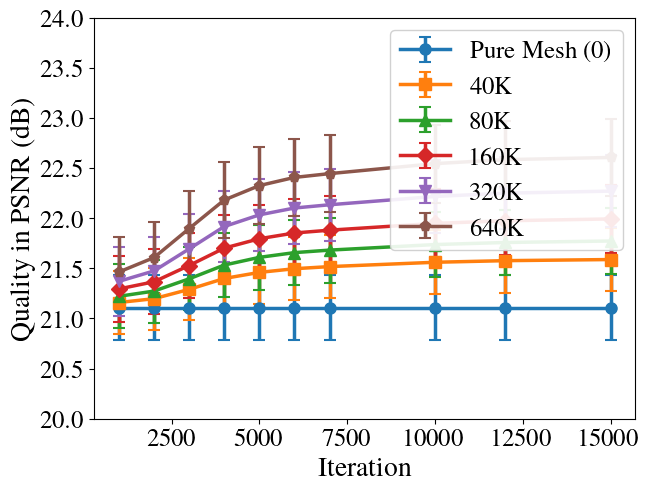


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.5360, std=0.0642, n=25
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.5381, std=0.0644, n=25
    Iter 2000: mean=0.5390, std=0.0644, n=25
    Iter 3000: mean=0.5405, std=0.0646, n=25
    Iter 4000: mean=0.5424, std=0.0648, n=25
    Iter 5000: mean=0.5434, std=0.0649, n=25
    Iter 6000: mean=0.5441, std=0.0649, n=25
    Iter 7000: mean=0.5444, std=0.0650, n=25
    Iter 10000: mean=0.5452, std=0.0650, n=25
    Iter 12000: mean=0.5455, std=0.0650, n=25
    Iter 15000: mean=0.5458, std=0.0650, n=25
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.5409, std=0.0646, n=25
    Iter 2000: mean=0.5423, std=0.0646, n=25
    Iter 3000: mean=0.5448, std=0.0650, n=25
    Iter 4000: mean=0.5475, std=0.0654, n=25
    Iter 5000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_bicycle-dw50_distortion.png and .eps



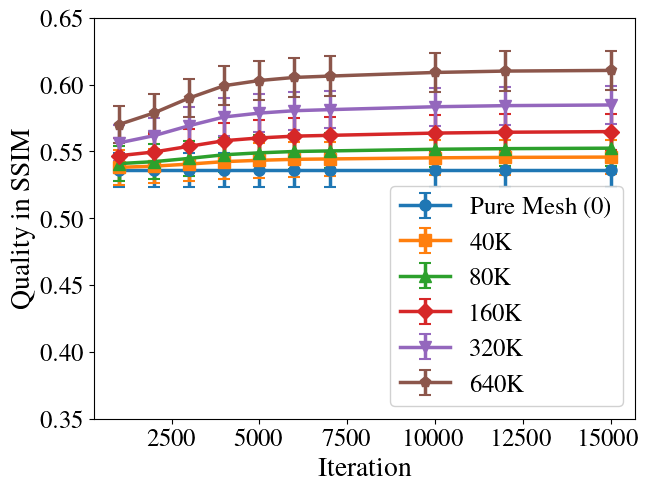


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=25.1996, std=0.5873, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.1357, std=0.5874, n=200
    Iter 2000: mean=25.1037, std=0.5848, n=200
    Iter 3000: mean=25.2088, std=0.5998, n=200
    Iter 4000: mean=25.3177, std=0.6232, n=200
    Iter 5000: mean=25.3912, std=0.6385, n=200
    Iter 6000: mean=25.4421, std=0.6486, n=200
    Iter 7000: mean=25.4806, std=0.6569, n=200
    Iter 10000: mean=25.5357, std=0.6754, n=200
    Iter 12000: mean=25.5487, std=0.6839, n=200
    Iter 15000: mean=25.5531, std=0.6965, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.1463, std=0.5756, n=200
    Iter 2000: mean=25.1099, std=0.5733, n=200
    Iter 3000: mean=25.2605, std=0.6019, n=200
    Iter 4000: mean=25.4150, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_ficus_distortion.png and .eps



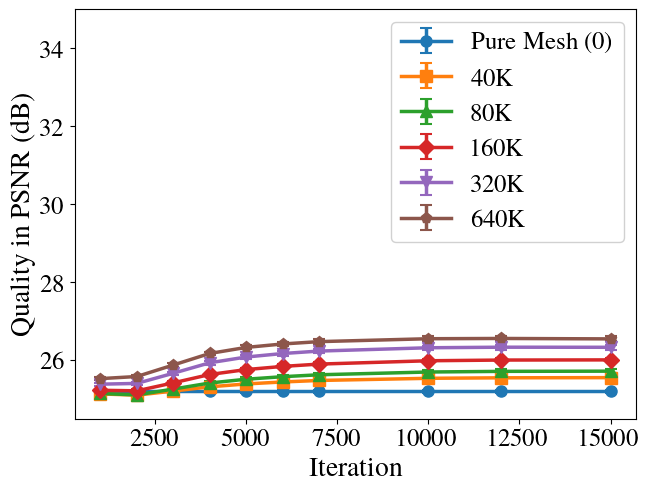


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.9124, std=0.0060, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9154, std=0.0060, n=200
    Iter 2000: mean=0.9162, std=0.0060, n=200
    Iter 3000: mean=0.9178, std=0.0062, n=200
    Iter 4000: mean=0.9187, std=0.0065, n=200
    Iter 5000: mean=0.9190, std=0.0068, n=200
    Iter 6000: mean=0.9192, std=0.0069, n=200
    Iter 7000: mean=0.9193, std=0.0071, n=200
    Iter 10000: mean=0.9194, std=0.0074, n=200
    Iter 12000: mean=0.9194, std=0.0075, n=200
    Iter 15000: mean=0.9194, std=0.0077, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9175, std=0.0059, n=200
    Iter 2000: mean=0.9188, std=0.0059, n=200
    Iter 3000: mean=0.9210, std=0.0062, n=200
    Iter 4000: mean=0.9224, std=0.0068, n=20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_ficus_distortion.png and .eps



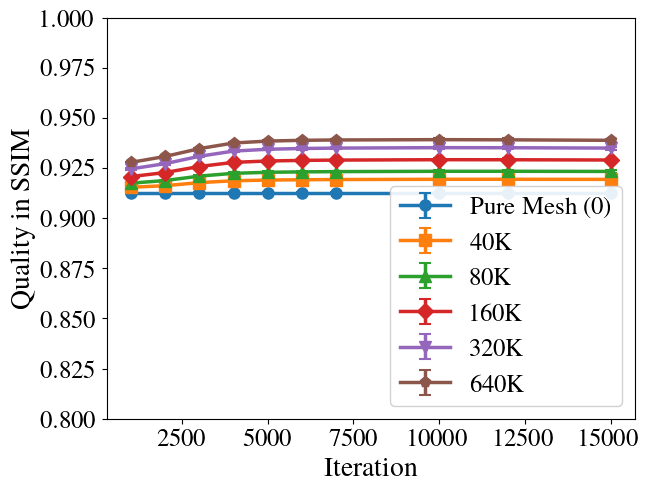


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=28.9337, std=1.5587, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=29.4247, std=1.7933, n=200
    Iter 2000: mean=29.6307, std=1.7834, n=200
    Iter 3000: mean=30.0801, std=1.7091, n=200
    Iter 4000: mean=30.3098, std=1.6982, n=200
    Iter 5000: mean=30.4186, std=1.6892, n=200
    Iter 6000: mean=30.4894, std=1.6735, n=200
    Iter 7000: mean=30.5445, std=1.6541, n=200
    Iter 10000: mean=30.6642, std=1.6118, n=200
    Iter 12000: mean=30.7230, std=1.5876, n=200
    Iter 15000: mean=30.7906, std=1.5475, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=29.7897, std=2.0947, n=200
    Iter 2000: mean=30.0982, std=2.1287, n=200
    Iter 3000: mean=30.8374, std=2.0505, n=200
    Iter 4000: mean=31.1861, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_hotdog_distortion.png and .eps



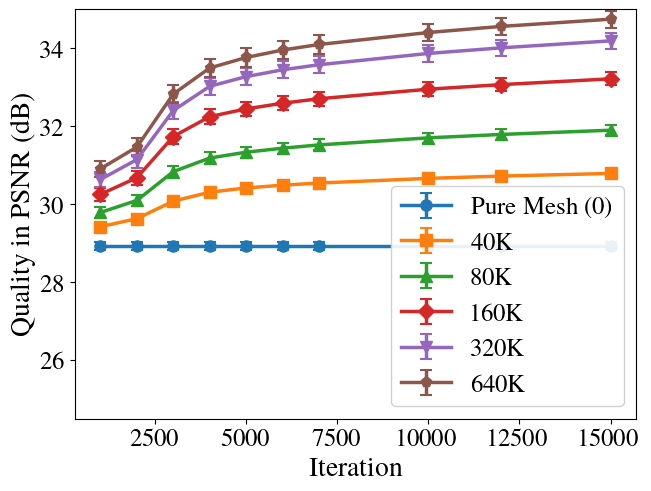


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.9528, std=0.0064, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9549, std=0.0060, n=200
    Iter 2000: mean=0.9565, std=0.0057, n=200
    Iter 3000: mean=0.9585, std=0.0060, n=200
    Iter 4000: mean=0.9596, std=0.0058, n=200
    Iter 5000: mean=0.9599, std=0.0059, n=200
    Iter 6000: mean=0.9600, std=0.0059, n=200
    Iter 7000: mean=0.9601, std=0.0060, n=200
    Iter 10000: mean=0.9602, std=0.0061, n=200
    Iter 12000: mean=0.9602, std=0.0062, n=200
    Iter 15000: mean=0.9603, std=0.0063, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9575, std=0.0052, n=200
    Iter 2000: mean=0.9599, std=0.0047, n=200
    Iter 3000: mean=0.9625, std=0.0048, n=200
    Iter 4000: mean=0.9640, std=0.0046, n=20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_hotdog_distortion.png and .eps



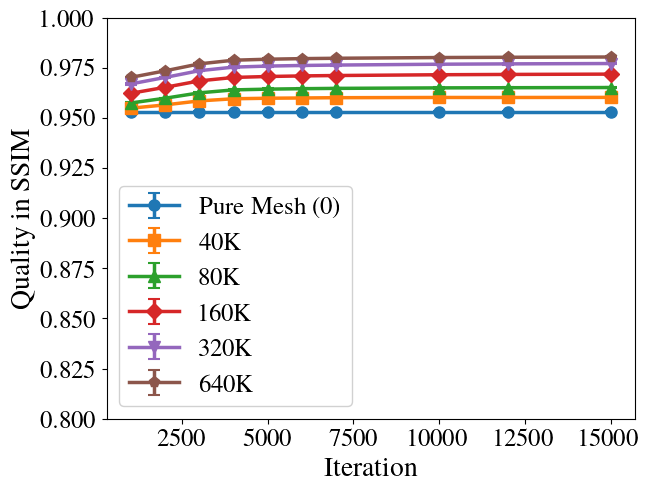


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=25.3864, std=1.2767, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.7461, std=1.2444, n=200
    Iter 2000: mean=25.9262, std=1.2712, n=200
    Iter 3000: mean=26.2835, std=1.3260, n=200
    Iter 4000: mean=26.6703, std=1.3554, n=200
    Iter 5000: mean=26.8647, std=1.3821, n=200
    Iter 6000: mean=26.9665, std=1.4033, n=200
    Iter 7000: mean=27.0346, std=1.4138, n=200
    Iter 10000: mean=27.1379, std=1.4253, n=200
    Iter 12000: mean=27.1724, std=1.4347, n=200
    Iter 15000: mean=27.2065, std=1.4368, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.9963, std=1.2506, n=200
    Iter 2000: mean=26.2575, std=1.2964, n=200
    Iter 3000: mean=26.7194, std=1.3556, n=200
    Iter 4000: mean=27.1679, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_lego_distortion.png and .eps



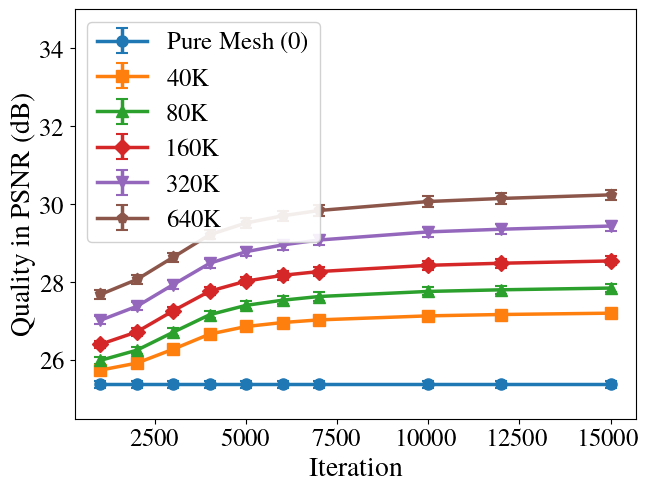


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.9057, std=0.0095, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9100, std=0.0074, n=200
    Iter 2000: mean=0.9127, std=0.0069, n=200
    Iter 3000: mean=0.9172, std=0.0068, n=200
    Iter 4000: mean=0.9204, std=0.0073, n=200
    Iter 5000: mean=0.9216, std=0.0076, n=200
    Iter 6000: mean=0.9222, std=0.0077, n=200
    Iter 7000: mean=0.9225, std=0.0078, n=200
    Iter 10000: mean=0.9231, std=0.0079, n=200
    Iter 12000: mean=0.9233, std=0.0080, n=200
    Iter 15000: mean=0.9235, std=0.0080, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9132, std=0.0066, n=200
    Iter 2000: mean=0.9174, std=0.0064, n=200
    Iter 3000: mean=0.9234, std=0.0066, n=200
    Iter 4000: mean=0.9275, std=0.0073, n=20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_lego_distortion.png and .eps



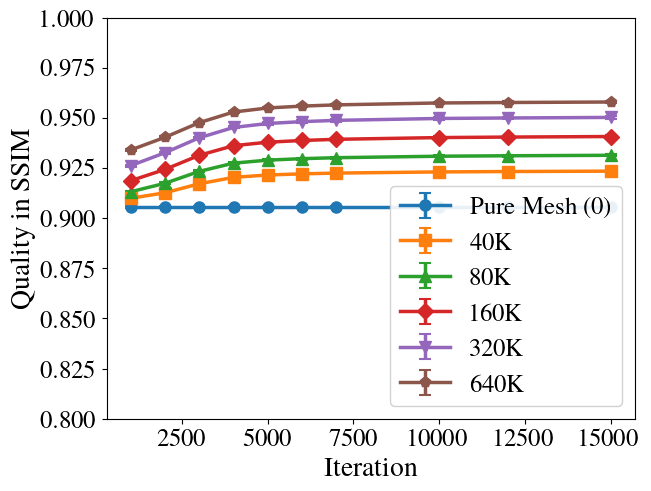


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=25.0636, std=0.9433, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.3883, std=1.0576, n=200
    Iter 2000: mean=25.5156, std=1.0944, n=200
    Iter 3000: mean=26.0339, std=1.0925, n=200
    Iter 4000: mean=26.4716, std=1.0999, n=200
    Iter 5000: mean=26.6597, std=1.1015, n=200
    Iter 6000: mean=26.7853, std=1.0979, n=200
    Iter 7000: mean=26.8681, std=1.0968, n=200
    Iter 10000: mean=27.0210, std=1.0934, n=200
    Iter 12000: mean=27.0802, std=1.0915, n=200
    Iter 15000: mean=27.1448, std=1.0943, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.5771, std=1.0530, n=200
    Iter 2000: mean=25.7431, std=1.0867, n=200
    Iter 3000: mean=26.3434, std=1.1010, n=200
    Iter 4000: mean=26.8723, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_mic_distortion.png and .eps



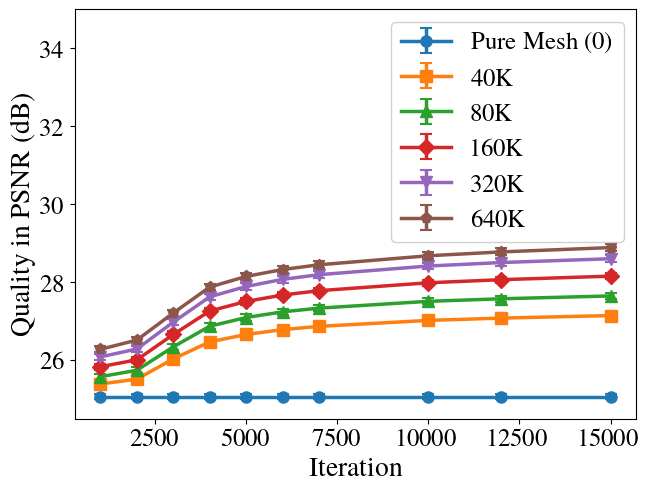


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.9045, std=0.0152, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9163, std=0.0122, n=200
    Iter 2000: mean=0.9185, std=0.0116, n=200
    Iter 3000: mean=0.9225, std=0.0108, n=200
    Iter 4000: mean=0.9253, std=0.0103, n=200
    Iter 5000: mean=0.9261, std=0.0101, n=200
    Iter 6000: mean=0.9267, std=0.0100, n=200
    Iter 7000: mean=0.9270, std=0.0100, n=200
    Iter 10000: mean=0.9276, std=0.0099, n=200
    Iter 12000: mean=0.9278, std=0.0099, n=200
    Iter 15000: mean=0.9281, std=0.0098, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.9254, std=0.0098, n=200
    Iter 2000: mean=0.9286, std=0.0091, n=200
    Iter 3000: mean=0.9340, std=0.0081, n=200
    Iter 4000: mean=0.9376, std=0.0077, n=20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_mic_distortion.png and .eps



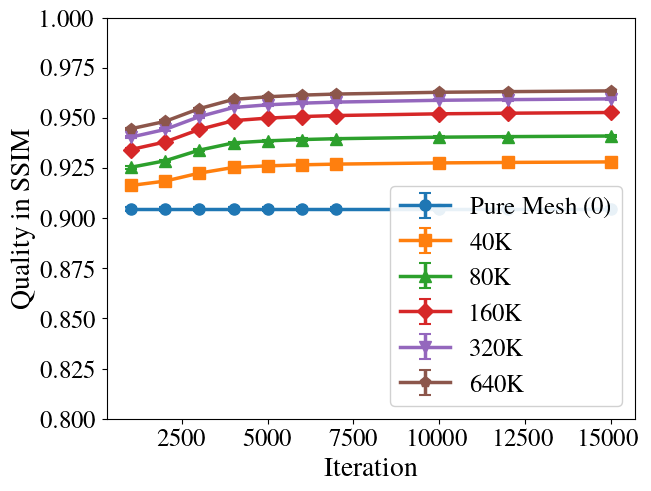


Plotting PSNR vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=24.9541, std=0.7644, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.0249, std=1.0139, n=200
    Iter 2000: mean=25.1668, std=0.9560, n=200
    Iter 3000: mean=25.4952, std=0.8180, n=200
    Iter 4000: mean=25.7567, std=0.7114, n=200
    Iter 5000: mean=25.8622, std=0.6717, n=200
    Iter 6000: mean=25.9246, std=0.6488, n=200
    Iter 7000: mean=25.9700, std=0.6299, n=200
    Iter 10000: mean=26.0439, std=0.6058, n=200
    Iter 12000: mean=26.0735, std=0.5972, n=200
    Iter 15000: mean=26.1011, std=0.5897, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=25.0414, std=1.1323, n=200
    Iter 2000: mean=25.2249, std=1.0835, n=200
    Iter 3000: mean=25.6655, std=0.9326, n=200
    Iter 4000: mean=26.0403, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_iteration_ship_distortion.png and .eps



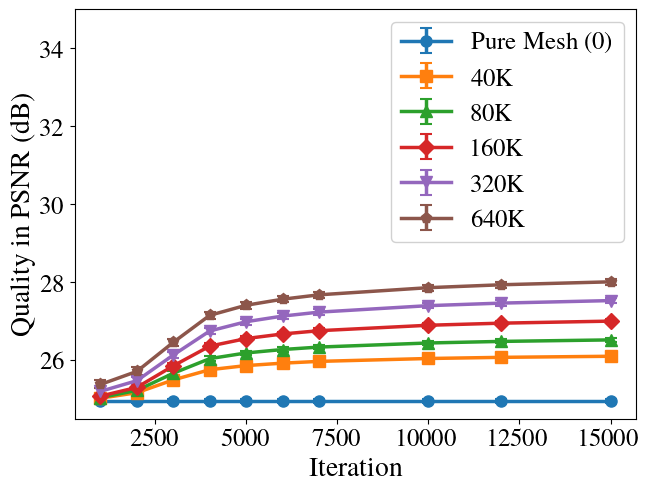


Plotting SSIM vs Iteration for distortion policy

Processing Pure Mesh (0):
  File: per_view_gs_mesh.json, exists: True
  Pure Mesh: mean=0.8163, std=0.0390, n=200
  Plotting 10 points for Pure Mesh (0)

Processing 40K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.8186, std=0.0376, n=200
    Iter 2000: mean=0.8226, std=0.0361, n=200
    Iter 3000: mean=0.8282, std=0.0349, n=200
    Iter 4000: mean=0.8318, std=0.0340, n=200
    Iter 5000: mean=0.8328, std=0.0340, n=200
    Iter 6000: mean=0.8332, std=0.0340, n=200
    Iter 7000: mean=0.8336, std=0.0341, n=200
    Iter 10000: mean=0.8340, std=0.0341, n=200
    Iter 12000: mean=0.8342, std=0.0340, n=200
    Iter 15000: mean=0.8343, std=0.0340, n=200
  Plotting 10 points for 40K

Processing 80K:
  File: per_view_gs_mesh.json, exists: True
    Iter 1000: mean=0.8198, std=0.0366, n=200
    Iter 2000: mean=0.8258, std=0.0344, n=200
    Iter 3000: mean=0.8338, std=0.0326, n=200
    Iter 4000: mean=0.8389, std=0.0314, n=20

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_iteration_ship_distortion.png and .eps



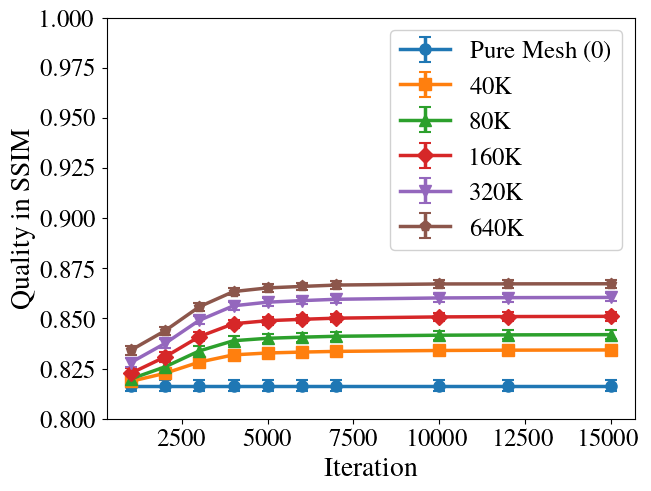

In [25]:
def iter_budget_curves():
    """
    Plot metrics vs iteration for different budgets using distortion policy.
    
    x-axis: iteration number (1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000, 12000, 15000)
    y-axis: quality in PSNR/SSIM/LPIPS
    hue: different bit budgets (0, 40k, 80k, 160k, 320k, 640k) using distortion policy
    """
    POLICY = 'distortion'  # Fixed policy
    MESH_ITERATION = 'ours_1'
    
    input_dir = Path('./data') / SCENE_NAME
    output_dir = Path('./plots') / 'iter_budget_curves' / SCENE_NAME
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define budgets with their configurations
    budget_configs = [
        {'budget': 0, 'label': 'Pure Mesh (0)', 'marker': 'o', 'color': color_palette[0], 'is_mesh': True},
        {'budget': 40000, 'label': '40K', 'marker': 's', 'color': color_palette[1], 'is_mesh': False},
        {'budget': 80000, 'label': '80K', 'marker': '^', 'color': color_palette[2], 'is_mesh': False},
        {'budget': 160000, 'label': '160K', 'marker': 'D', 'color': color_palette[3], 'is_mesh': False},
        {'budget': 320000, 'label': '320K', 'marker': 'v', 'color': color_palette[4], 'is_mesh': False},
        {'budget': 640000, 'label': '640K', 'marker': 'p', 'color': color_palette[5], 'is_mesh': False},
    ]
    
    # Define iterations to plot
    iterations = ['ours_1000', 'ours_2000', 'ours_3000', 'ours_4000', 'ours_5000', 
                  'ours_6000', 'ours_7000', 'ours_10000', 'ours_12000', 'ours_15000']
    iter_nums = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000, 12000, 15000]
    
    # Quality Metrics to plot
    metrics = {
        'PSNR': {'ylabel': 'PSNR (dB)', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        # 'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'}
    }
    
    # Plot each metric
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting {metric_key} vs Iteration for {POLICY} policy")
        print(f"{'='*60}")
        
        # Process each budget
        for config in budget_configs:
            budget = config['budget']
            xs = []
            ys = []
            errs = []
            
            if config['is_mesh']:
                # Pure mesh baseline - use area_1_occlusion
                mesh_file = input_dir / 'area_1_occlusion' / 'per_view_gs_mesh.json'
                print(f"\nProcessing {config['label']}:")
                print(f"  File: {mesh_file.name}, exists: {mesh_file.exists()}")
                
                if mesh_file.exists():
                    with open(mesh_file, 'r') as f:
                        data = json.load(f)
                    
                    # For pure mesh, only use MESH_ITERATION
                    if MESH_ITERATION in data:
                        metric_data = data[MESH_ITERATION][metric_key]
                        if isinstance(metric_data, dict):
                            values = [v for v in metric_data.values() if v != -1.0]
                        else:
                            values = [metric_data]
                        
                        mean_val = np.mean(values)
                        std_val = np.std(values)
                        stderr = std_val / np.sqrt(len(values))
                        
                        # Plot as a horizontal line (same value for all iterations)
                        xs = iter_nums
                        ys = [mean_val] * len(iter_nums)
                        errs = [stderr] * len(iter_nums)
                        
                        print(f"  Pure Mesh: mean={mean_val:.4f}, std={std_val:.4f}, n={len(values)}")
            else:
                # Policy with budget
                policy_file = input_dir / f'{POLICY}_{budget}_occlusion' / 'per_view_gs_mesh.json'
                print(f"\nProcessing {config['label']}:")
                print(f"  File: {policy_file.name}, exists: {policy_file.exists()}")
                
                if policy_file.exists():
                    with open(policy_file, 'r') as f:
                        data = json.load(f)
                    
                    for iter_key, iter_num in zip(iterations, iter_nums):
                        if iter_key in data:
                            metric_data = data[iter_key][metric_key]
                            if isinstance(metric_data, dict):
                                values = [v for v in metric_data.values() if v != -1.0]
                            else:
                                values = [metric_data]
                            
                            mean_val = np.mean(values)
                            std_val = np.std(values)
                            stderr = std_val / np.sqrt(len(values))
                            
                            xs.append(iter_num)
                            ys.append(mean_val)
                            errs.append(stderr)
                            
                            print(f"    Iter {iter_num}: mean={mean_val:.4f}, std={std_val:.4f}, n={len(values)}")
                        else:
                            print(f"    Iter {iter_num}: {iter_key} not found")
            
            # Plot this budget
            if xs:
                print(f"  Plotting {len(xs)} points for {config['label']}")
                ax.errorbar(xs, ys, yerr=errs,
                           marker=config['marker'], markersize=8, linewidth=2.5,
                           capsize=err_capsize, capthick=err_capthick,
                           color=config['color'], label=config['label'], zorder=2)
            else:
                print(f"  No data to plot for {config['label']}!")
        
        # Formatting
        ax.set_xlabel('Iteration', fontsize=20)
        ax.set_ylabel(f"Quality in {metric_info['ylabel']}", fontsize=20)
        
        # Set fixed y-axis range
        set_metric_ylim_fig(ax, metric_key, SCENE_NAME)
        
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        # Save both formats
        base_name = f'{metric_key}_vs_iteration_{SCENE_NAME}_{POLICY}'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()



# SCENE_NAME = 'bicycle'
# iter_budget_curves()

for name in SCENE_NAME_LIST:
    SCENE_NAME = name
    iter_budget_curves()


  ficus - PSNR: 25.1996
  ficus - SSIM: 0.9124
  ficus - LPIPS: 0.0881
  hotdog - PSNR: 28.9337
  hotdog - SSIM: 0.9528
  hotdog - LPIPS: 0.0716
  lego - PSNR: 25.3864
  lego - SSIM: 0.9057
  lego - LPIPS: 0.1008
  mic - PSNR: 25.0636
  mic - SSIM: 0.9045
  mic - LPIPS: 0.0903
  ship - PSNR: 24.9541
  ship - SSIM: 0.8163
  ship - LPIPS: 0.2113
  bicycle-dw50 - PSNR: 21.1066
  bicycle-dw50 - SSIM: 0.5360
  bicycle-dw50 - LPIPS: 0.4476

Plotting Average Delta PSNR vs Iteration for distortion policy

Processing 40K:
  Iter 1000: mean_delta=0.2058, std=0.1974, n=6
  Iter 2000: mean_delta=0.3161, std=0.2723, n=6
  Iter 3000: mean_delta=0.6246, std=0.4176, n=6
  Iter 4000: mean_delta=0.8802, std=0.5196, n=6
  Iter 5000: mean_delta=1.0020, std=0.5627, n=6
  Iter 6000: mean_delta=1.0767, std=0.5885, n=6
  Iter 7000: mean_delta=1.1285, std=0.6063, n=6
  Iter 10000: mean_delta=1.2199, std=0.6419, n=6
  Iter 12000: mean_delta=1.2551, std=0.6586, n=6
  Iter 15000: mean_delta=1.2900, std=0.6807, n

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_delta_vs_iteration_average_distortion.png and .eps



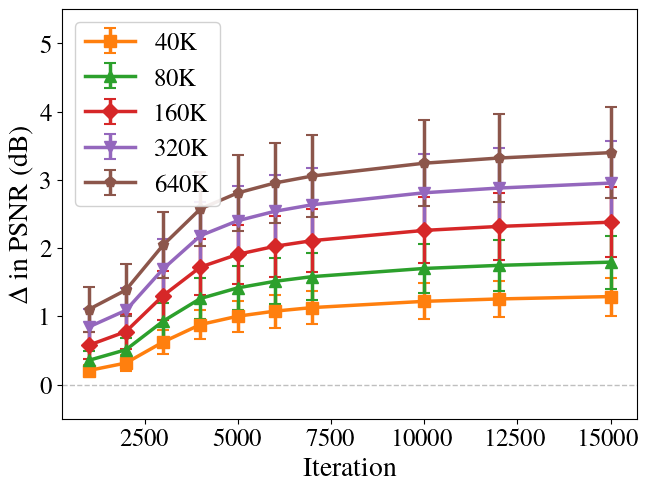


Plotting Average Delta SSIM vs Iteration for distortion policy

Processing 40K:
  Iter 1000: mean_delta=0.0043, std=0.0035, n=6
  Iter 2000: mean_delta=0.0063, std=0.0037, n=6
  Iter 3000: mean_delta=0.0095, std=0.0048, n=6
  Iter 4000: mean_delta=0.0117, std=0.0056, n=6
  Iter 5000: mean_delta=0.0125, std=0.0058, n=6
  Iter 6000: mean_delta=0.0129, std=0.0059, n=6
  Iter 7000: mean_delta=0.0132, std=0.0060, n=6
  Iter 10000: mean_delta=0.0136, std=0.0061, n=6
  Iter 12000: mean_delta=0.0138, std=0.0062, n=6
  Iter 15000: mean_delta=0.0139, std=0.0062, n=6
  Plotting 10 points for 40K

Processing 80K:
  Iter 1000: mean_delta=0.0078, std=0.0060, n=6
  Iter 2000: mean_delta=0.0109, std=0.0062, n=6
  Iter 3000: mean_delta=0.0153, std=0.0074, n=6
  Iter 4000: mean_delta=0.0184, std=0.0083, n=6
  Iter 5000: mean_delta=0.0194, std=0.0085, n=6
  Iter 6000: mean_delta=0.0199, std=0.0086, n=6
  Iter 7000: mean_delta=0.0203, std=0.0087, n=6
  Iter 10000: mean_delta=0.0209, std=0.0088, n=6
  Ite

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_delta_vs_iteration_average_distortion.png and .eps



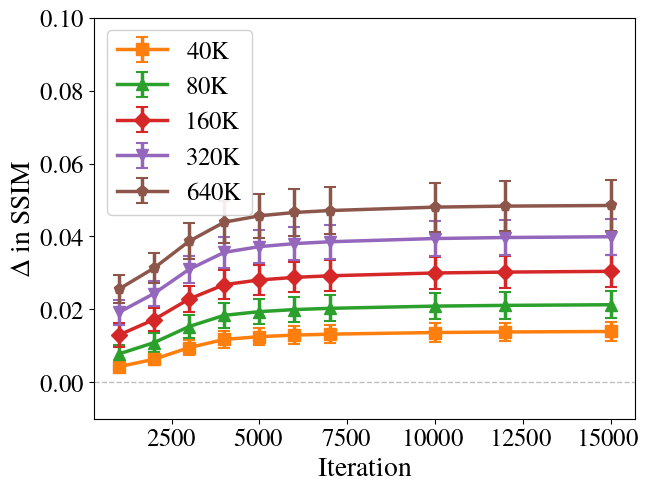


Plotting Average Delta LPIPS vs Iteration for distortion policy

Processing 40K:
  Iter 1000: mean_delta=nan, std=nan, n=6
  Iter 2000: mean_delta=nan, std=nan, n=6
  Iter 3000: mean_delta=nan, std=nan, n=6
  Iter 4000: mean_delta=nan, std=nan, n=6
  Iter 5000: mean_delta=nan, std=nan, n=6
  Iter 6000: mean_delta=nan, std=nan, n=6
  Iter 7000: mean_delta=nan, std=nan, n=6
  Iter 10000: mean_delta=nan, std=nan, n=6
  Iter 12000: mean_delta=nan, std=nan, n=6
  Iter 15000: mean_delta=nan, std=nan, n=6
  Plotting 10 points for 40K

Processing 80K:
  Iter 1000: mean_delta=nan, std=nan, n=6
  Iter 2000: mean_delta=nan, std=nan, n=6
  Iter 3000: mean_delta=nan, std=nan, n=6
  Iter 4000: mean_delta=nan, std=nan, n=6
  Iter 5000: mean_delta=nan, std=nan, n=6
  Iter 6000: mean_delta=nan, std=nan, n=6


/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


  Iter 7000: mean_delta=nan, std=nan, n=6
  Iter 10000: mean_delta=nan, std=nan, n=6
  Iter 12000: mean_delta=nan, std=nan, n=6
  Iter 15000: mean_delta=nan, std=nan, n=6
  Plotting 10 points for 80K

Processing 160K:
  Iter 1000: mean_delta=nan, std=nan, n=6
  Iter 2000: mean_delta=nan, std=nan, n=6
  Iter 3000: mean_delta=nan, std=nan, n=6
  Iter 4000: mean_delta=nan, std=nan, n=6
  Iter 5000: mean_delta=nan, std=nan, n=6
  Iter 6000: mean_delta=nan, std=nan, n=6
  Iter 7000: mean_delta=nan, std=nan, n=6
  Iter 10000: mean_delta=nan, std=nan, n=6
  Iter 12000: mean_delta=nan, std=nan, n=6
  Iter 15000: mean_delta=nan, std=nan, n=6
  Plotting 10 points for 160K

Processing 320K:
  Iter 1000: mean_delta=nan, std=nan, n=6
  Iter 2000: mean_delta=nan, std=nan, n=6
  Iter 3000: mean_delta=nan, std=nan, n=6
  Iter 4000: mean_delta=nan, std=nan, n=6
  Iter 5000: mean_delta=nan, std=nan, n=6
  Iter 6000: mean_delta=nan, std=nan, n=6
  Iter 7000: mean_delta=nan, std=nan, n=6
  Iter 10000: mea

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_delta_vs_iteration_average_distortion.png and .eps



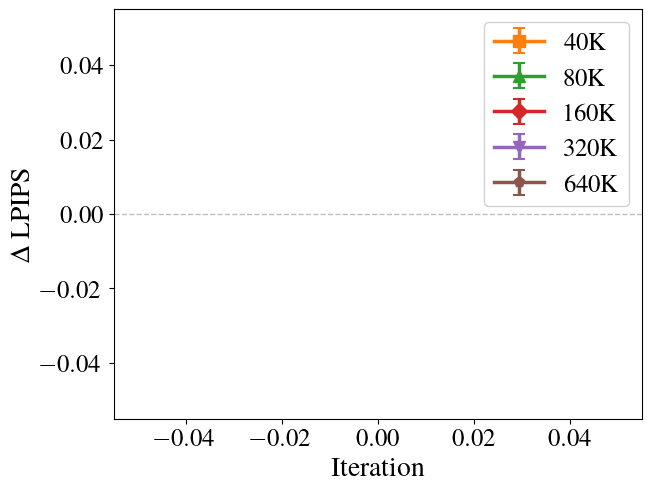

In [26]:

def iter_budget_curves_delta_average():
    """
    Plot average delta (improvement over pure mesh) vs iteration for different budgets.
    Averaged across all scenes using distortion policy.
    
    x-axis: iteration number (1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000, 12000, 15000)
    y-axis: delta of quality in PSNR/SSIM/LPIPS (compared to pure mesh baseline)
    hue: different bit budgets (40k, 80k, 160k, 320k, 640k) using distortion policy
    """
    POLICY = 'distortion'  # Fixed policy
    MESH_ITERATION = 'ours_1'
    
    SCENES = ['ficus', 'hotdog', 'lego', 'mic', 'ship', 'bicycle-dw50']
    
    input_dir = Path('./data')
    output_dir = Path('./plots') / 'iter_budget_curves_delta_average'
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define budgets with their configurations (exclude pure mesh)
    budget_configs = [
        {'budget': 40000, 'label': '40K', 'marker': 's', 'color': color_palette[1]},
        {'budget': 80000, 'label': '80K', 'marker': '^', 'color': color_palette[2]},
        {'budget': 160000, 'label': '160K', 'marker': 'D', 'color': color_palette[3]},
        {'budget': 320000, 'label': '320K', 'marker': 'v', 'color': color_palette[4]},
        {'budget': 640000, 'label': '640K', 'marker': 'p', 'color': color_palette[5]},
    ]
    
    # Define iterations to plot
    iterations = ['ours_1000', 'ours_2000', 'ours_3000', 'ours_4000', 'ours_5000', 
                  'ours_6000', 'ours_7000', 'ours_10000', 'ours_12000', 'ours_15000']
    iter_nums = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000, 12000, 15000]
    
    # Quality Metrics to plot
    metrics = {
        'PSNR': {'ylabel': r'$\Delta$ in PSNR (dB)', 'title': 'PSNR Improvement'},
        'SSIM': {'ylabel': r'$\Delta$ in SSIM', 'title': 'SSIM Improvement'},
        'LPIPS': {'ylabel': r'$\Delta$ LPIPS', 'title': 'LPIPS Improvement'}
    }
    
    # First, collect pure mesh baselines for each scene
    print(f"\n{'='*60}")
    print(f"Collecting Pure Mesh Baselines")
    print(f"{'='*60}")
    
    scene_baselines = {}
    for scene in SCENES:
        scene_dir = input_dir / scene
        mesh_file = scene_dir / 'area_1_occlusion' / 'per_view_gs_mesh.json'
        
        if mesh_file.exists():
            with open(mesh_file, 'r') as f:
                data = json.load(f)
            
            if MESH_ITERATION in data:
                scene_baselines[scene] = {}
                for metric_key in metrics.keys():
                    metric_data = data[MESH_ITERATION][metric_key]
                    if isinstance(metric_data, dict):
                        values = [v for v in metric_data.values() if v != -1.0]
                        scene_baselines[scene][metric_key] = np.mean(values)
                    else:
                        scene_baselines[scene][metric_key] = metric_data
                    
                    print(f"  {scene} - {metric_key}: {scene_baselines[scene][metric_key]:.4f}")
    
    # Plot each metric
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting Average Delta {metric_key} vs Iteration for {POLICY} policy")
        print(f"{'='*60}")
        
        # Process each budget
        for config in budget_configs:
            budget = config['budget']
            xs = []
            ys = []
            errs = []
            
            print(f"\nProcessing {config['label']}:")
            
            # For each iteration
            for iter_key, iter_num in zip(iterations, iter_nums):
                iter_deltas_all_scenes = []
                
                for scene in SCENES:
                    if scene not in scene_baselines:
                        continue
                    
                    baseline = scene_baselines[scene][metric_key]
                    scene_dir = input_dir / scene
                    policy_file = scene_dir / f'{POLICY}_{budget}_occlusion' / 'per_view_gs_mesh.json'
                    
                    if policy_file.exists():
                        with open(policy_file, 'r') as f:
                            data = json.load(f)
                        
                        if iter_key in data:
                            metric_data = data[iter_key][metric_key]
                            if isinstance(metric_data, dict):
                                values = [v for v in metric_data.values() if v != -1.0]
                                scene_mean = np.mean(values)
                            else:
                                scene_mean = metric_data
                            
                            # Compute delta (improvement over baseline)
                            # For LPIPS, lower is better, so we flip the sign
                            if metric_key == 'LPIPS':
                                delta = baseline - scene_mean  # Positive = improvement
                            else:
                                delta = scene_mean - baseline  # Positive = improvement
                            
                            iter_deltas_all_scenes.append(delta)
                
                # Compute average delta across scenes for this iteration
                if iter_deltas_all_scenes:
                    mean_delta = np.mean(iter_deltas_all_scenes)
                    std_delta = np.std(iter_deltas_all_scenes)
                    stderr_delta = std_delta / np.sqrt(len(iter_deltas_all_scenes))
                    
                    xs.append(iter_num)
                    ys.append(mean_delta)
                    errs.append(stderr_delta)
                    
                    print(f"  Iter {iter_num}: mean_delta={mean_delta:.4f}, std={std_delta:.4f}, n={len(iter_deltas_all_scenes)}")
                else:
                    print(f"  Iter {iter_num}: No data found")
            
            # Plot this budget
            if xs:
                print(f"  Plotting {len(xs)} points for {config['label']}")
                ax.errorbar(xs, ys, yerr=errs,
                           marker=config['marker'], markersize=8, linewidth=2.5,
                           capsize=err_capsize, capthick=err_capthick,
                           color=config['color'], label=config['label'], zorder=2)
            else:
                print(f"  No data to plot for {config['label']}!")
        
        # Add horizontal line at y=0 (no improvement)
        ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
        
        # Formatting
        ax.set_xlabel('Iteration', fontsize=20)
        ax.set_ylabel(metric_info['ylabel'], fontsize=20)
        
        # Set fixed y-axis range for delta plots
        set_metric_ylim_delta(ax, metric_key)
        
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        # Save both formats
        base_name = f'{metric_key}_delta_vs_iteration_average_{POLICY}'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()


# Run delta averaged plot
iter_budget_curves_delta_average()

## Fig Renderer

compare DTGS, TGS, GaMeS


Plotting PSNR - Renderer Comparison for drjohnson-dw50
Pure Mesh - PSNR: mean=27.5558, std=1.7082, n=33

Processing DTGS (Ours):
  Budget 40000: mean=27.5793, std=1.7104, splats=40000
  Budget 80000: mean=27.6069, std=1.7242, splats=80000
  Budget 160000: mean=27.6478, std=1.7269, splats=160000
  Budget 320000: mean=27.7226, std=1.7210, splats=320000
  Budget 640000: mean=27.8604, std=1.8420, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: File not found - data/drjohnson-dw50/uniform_40000_no_occlusion/per_view_gs_mesh.json
  Budget 80000: File not found - data/drjohnson-dw50/uniform_80000_no_occlusion/per_view_gs_mesh.json
  Budget 160000: File not found - data/drjohnson-dw50/uniform_160000_no_occlusion/per_view_gs_mesh.json
  Budget 320000: File not found - data/drjohnson-dw50/uniform_320000_no_occlusion/per_view_gs_mesh.json
  Budget 640000: File not found - data/drjohnson-dw50/uniform_640000_no_occlusion/per_view_gs_mesh.json
  Plotting 1 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_drjohnson-dw50.png and .eps



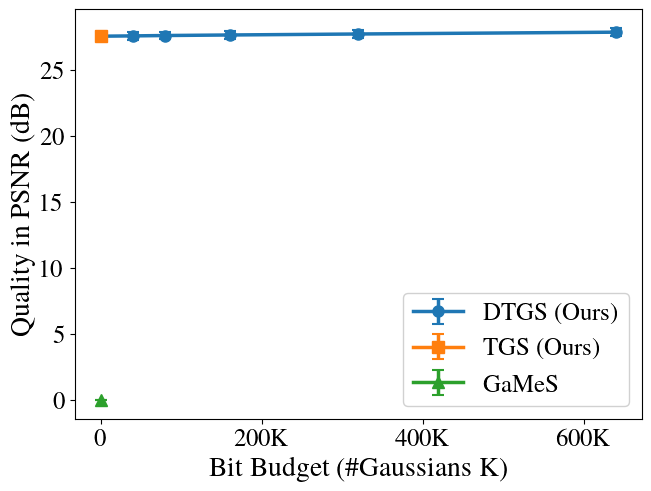


Plotting SSIM - Renderer Comparison for drjohnson-dw50
Pure Mesh - SSIM: mean=0.8487, std=0.0602, n=33

Processing DTGS (Ours):
  Budget 40000: mean=0.8490, std=0.0601, splats=40000
  Budget 80000: mean=0.8491, std=0.0601, splats=80000
  Budget 160000: mean=0.8493, std=0.0601, splats=160000
  Budget 320000: mean=0.8507, std=0.0591, splats=320000
  Budget 640000: mean=0.8513, std=0.0590, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: File not found - data/drjohnson-dw50/uniform_40000_no_occlusion/per_view_gs_mesh.json
  Budget 80000: File not found - data/drjohnson-dw50/uniform_80000_no_occlusion/per_view_gs_mesh.json
  Budget 160000: File not found - data/drjohnson-dw50/uniform_160000_no_occlusion/per_view_gs_mesh.json
  Budget 320000: File not found - data/drjohnson-dw50/uniform_320000_no_occlusion/per_view_gs_mesh.json
  Budget 640000: File not found - data/drjohnson-dw50/uniform_640000_no_occlusion/per_view_gs_mesh.json
  Plotting 1 points

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_drjohnson-dw50.png and .eps



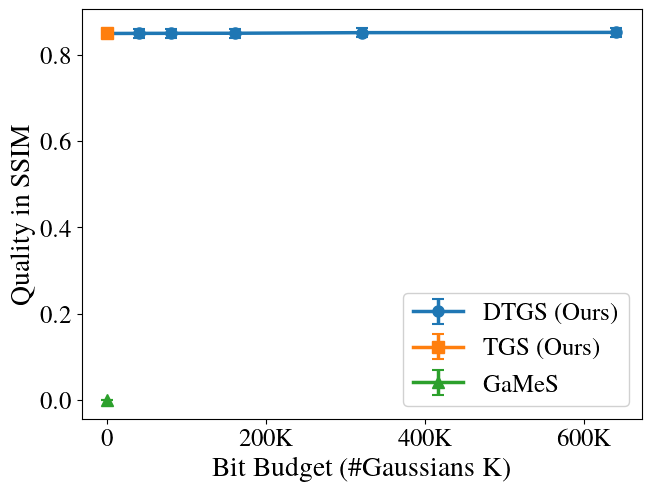


Plotting LPIPS - Renderer Comparison for drjohnson-dw50
Pure Mesh - LPIPS: mean=0.3605, std=0.0465, n=33

Processing DTGS (Ours):
  Budget 40000: mean=0.3614, std=0.0474, splats=40000
  Budget 80000: mean=0.3615, std=0.0472, splats=80000
  Budget 160000: mean=0.3619, std=0.0469, splats=160000
  Budget 320000: mean=0.3625, std=0.0472, splats=320000
  Budget 640000: mean=0.3589, std=0.0491, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: File not found - data/drjohnson-dw50/uniform_40000_no_occlusion/per_view_gs_mesh.json
  Budget 80000: File not found - data/drjohnson-dw50/uniform_80000_no_occlusion/per_view_gs_mesh.json
  Budget 160000: File not found - data/drjohnson-dw50/uniform_160000_no_occlusion/per_view_gs_mesh.json
  Budget 320000: File not found - data/drjohnson-dw50/uniform_320000_no_occlusion/per_view_gs_mesh.json
  Budget 640000: File not found - data/drjohnson-dw50/uniform_640000_no_occlusion/per_view_gs_mesh.json
  Plotting 1 poin

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_renderer_comp_drjohnson-dw50.png and .eps



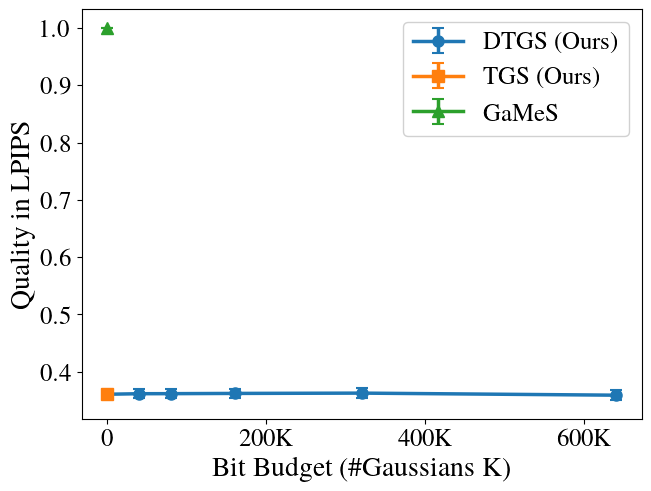


Plotting PSNR - Renderer Comparison for bicycle-dw50
Pure Mesh - PSNR: mean=21.1066, std=1.6186, n=25

Processing DTGS (Ours):
  Budget 40000: mean=21.1383, std=1.6260, splats=40000
  Budget 80000: mean=21.1452, std=1.6275, splats=80000
  Budget 160000: mean=21.2442, std=1.6506, splats=160000
  Budget 320000: mean=21.3503, std=1.6642, splats=320000
  Budget 640000: mean=21.4085, std=1.6789, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=21.1177, std=1.6179, splats=40000
  Budget 80000: mean=21.1189, std=1.6193, splats=80000
  Budget 160000: mean=21.1555, std=1.6256, splats=160000
  Budget 320000: mean=21.1742, std=1.6167, splats=320000
  Budget 640000: mean=21.1753, std=1.6345, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=9.5001, std=0.9267, splats=40000
  Budget 80000: mean=9.5820, std=0.9120, splats=80000
  Budget 160000: mean=9.8120, std=0.9163, splats=160000
  Budget 320000: mean=10.4818, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_bicycle-dw50.png and .eps



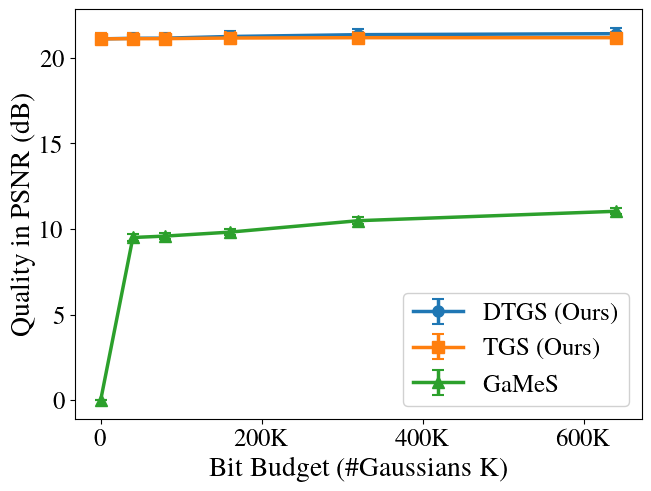


Plotting SSIM - Renderer Comparison for bicycle-dw50
Pure Mesh - SSIM: mean=0.5360, std=0.0642, n=25

Processing DTGS (Ours):
  Budget 40000: mean=0.5380, std=0.0644, splats=40000
  Budget 80000: mean=0.5388, std=0.0643, splats=80000
  Budget 160000: mean=0.5418, std=0.0640, splats=160000
  Budget 320000: mean=0.5505, std=0.0652, splats=320000
  Budget 640000: mean=0.5568, std=0.0649, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.5366, std=0.0644, splats=40000
  Budget 80000: mean=0.5370, std=0.0644, splats=80000
  Budget 160000: mean=0.5382, std=0.0641, splats=160000
  Budget 320000: mean=0.5414, std=0.0653, splats=320000
  Budget 640000: mean=0.5446, std=0.0656, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.0170, std=0.0050, splats=40000
  Budget 80000: mean=0.0227, std=0.0057, splats=80000
  Budget 160000: mean=0.0379, std=0.0109, splats=160000
  Budget 320000: mean=0.0656, std=0.0151, s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_bicycle-dw50.png and .eps



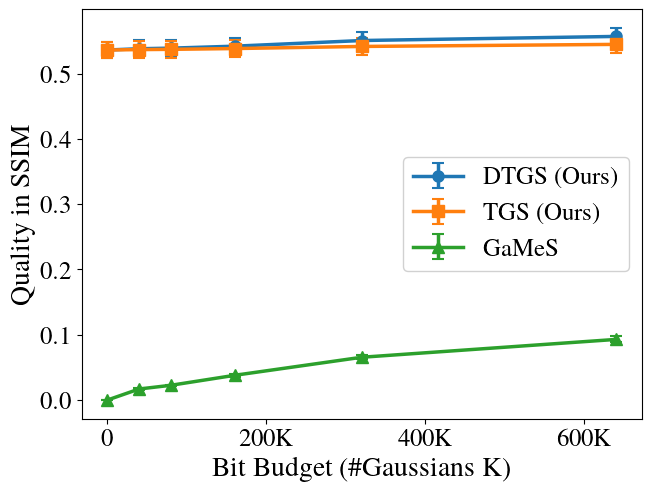


Plotting LPIPS - Renderer Comparison for bicycle-dw50
Pure Mesh - LPIPS: mean=0.4476, std=0.0306, n=25

Processing DTGS (Ours):
  Budget 40000: mean=0.4473, std=0.0302, splats=40000
  Budget 80000: mean=0.4464, std=0.0301, splats=80000
  Budget 160000: mean=0.4484, std=0.0296, splats=160000
  Budget 320000: mean=0.4429, std=0.0287, splats=320000
  Budget 640000: mean=0.4373, std=0.0280, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.4476, std=0.0305, splats=40000
  Budget 80000: mean=0.4471, std=0.0304, splats=80000
  Budget 160000: mean=0.4484, std=0.0300, splats=160000
  Budget 320000: mean=0.4470, std=0.0293, splats=320000
  Budget 640000: mean=0.4433, std=0.0291, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.7257, std=0.0214, splats=40000
  Budget 80000: mean=0.7114, std=0.0271, splats=80000
  Budget 160000: mean=0.7037, std=0.0271, splats=160000
  Budget 320000: mean=0.6666, std=0.0276,

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_renderer_comp_bicycle-dw50.png and .eps



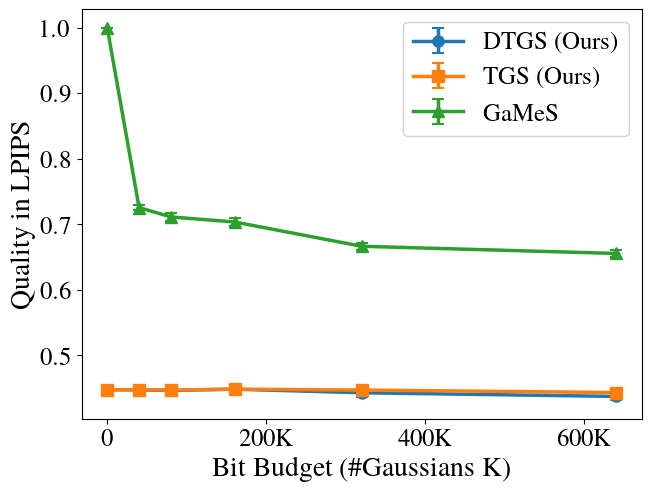


Plotting PSNR - Renderer Comparison for ficus
Pure Mesh - PSNR: mean=25.1996, std=0.5873, n=200

Processing DTGS (Ours):
  Budget 40000: mean=25.7287, std=0.5049, splats=40000
  Budget 80000: mean=26.1382, std=0.6058, splats=80000
  Budget 160000: mean=26.2570, std=0.6217, splats=160000
  Budget 320000: mean=26.3771, std=0.6539, splats=320000
  Budget 640000: mean=26.7055, std=0.8649, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=26.0064, std=0.5353, splats=40000
  Budget 80000: mean=26.6903, std=0.6157, splats=80000
  Budget 160000: mean=26.8721, std=0.6514, splats=160000
  Budget 320000: mean=27.1277, std=0.7035, splats=320000
  Budget 640000: mean=27.9633, std=0.9421, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=20.2864, std=0.8867, splats=40000
  Budget 80000: mean=23.7084, std=0.7768, splats=80000
  Budget 160000: mean=24.4674, std=0.9461, splats=160000
  Budget 320000: mean=26.0425, std=

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_ficus.png and .eps



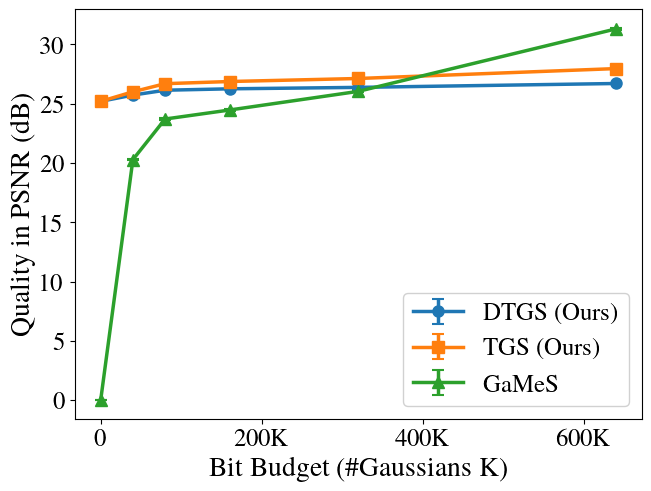


Plotting SSIM - Renderer Comparison for ficus
Pure Mesh - SSIM: mean=0.9124, std=0.0060, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.9201, std=0.0053, splats=40000
  Budget 80000: mean=0.9255, std=0.0072, splats=80000
  Budget 160000: mean=0.9280, std=0.0070, splats=160000
  Budget 320000: mean=0.9321, std=0.0072, splats=320000
  Budget 640000: mean=0.9393, std=0.0094, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.9185, std=0.0053, splats=40000
  Budget 80000: mean=0.9252, std=0.0071, splats=80000
  Budget 160000: mean=0.9279, std=0.0067, splats=160000
  Budget 320000: mean=0.9331, std=0.0080, splats=320000
  Budget 640000: mean=0.9450, std=0.0089, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.8803, std=0.0089, splats=40000
  Budget 80000: mean=0.9090, std=0.0084, splats=80000
  Budget 160000: mean=0.9208, std=0.0088, splats=160000
  Budget 320000: mean=0.9383, std=0.0118, splats=

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_ficus.png and .eps



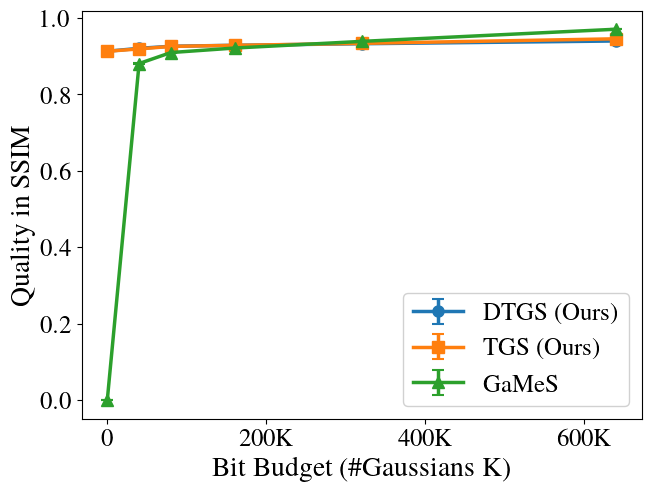


Plotting LPIPS - Renderer Comparison for ficus
Pure Mesh - LPIPS: mean=0.0881, std=0.0062, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.0900, std=0.0067, splats=40000
  Budget 80000: mean=0.0885, std=0.0075, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.0932, std=0.0069, splats=40000
  Budget 80000: mean=0.0921, std=0.0076, splats=80000
  Budget 160000: mean=0.0879, std=0.0072, splats=160000
  Budget 320000: mean=0.0794, std=0.0096, splats=320000
  Budget 640000: mean=0.0630, std=0.0086, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.1236, std=0.0090, splats=40000
  Budget 80000: mean=0.1086, std=0.0091, splats=80000
  Budget 160000: mean=0.0982, std=0.0086, splats=160000
  Budget 320000: mean=0.0788, std=0.0120, splats=320000
  Budget 

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_renderer_comp_ficus.png and .eps



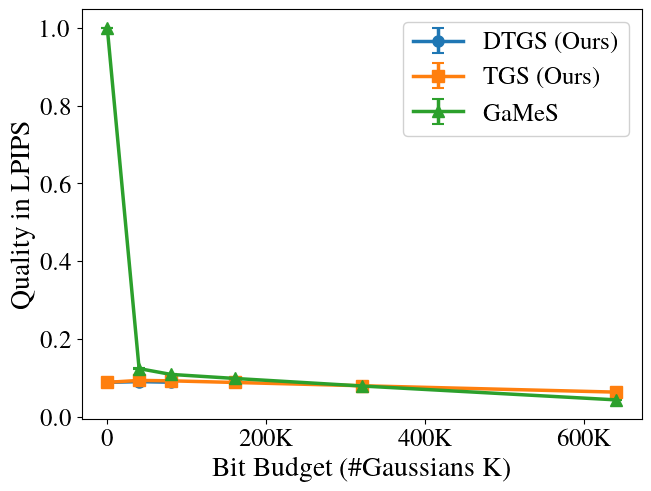


Plotting PSNR - Renderer Comparison for hotdog
Pure Mesh - PSNR: mean=28.9337, std=1.5587, n=200

Processing DTGS (Ours):
  Budget 40000: mean=30.2968, std=1.7358, splats=40000
  Budget 80000: mean=31.0009, std=1.9148, splats=80000
  Budget 160000: mean=31.6947, std=2.1421, splats=160000
  Budget 320000: mean=32.8689, std=2.1580, splats=320000
  Budget 640000: mean=34.6858, std=3.0386, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=29.8616, std=1.7467, splats=40000
  Budget 80000: mean=30.3651, std=1.9910, splats=80000
  Budget 160000: mean=30.8221, std=2.3309, splats=160000
  Budget 320000: mean=31.6293, std=2.4529, splats=320000
  Budget 640000: mean=34.1481, std=2.9644, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=14.4642, std=3.1449, splats=40000
  Budget 80000: mean=16.0275, std=2.9962, splats=80000
  Budget 160000: mean=17.3292, std=3.1445, splats=160000
  Budget 320000: mean=19.7307, std

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_hotdog.png and .eps



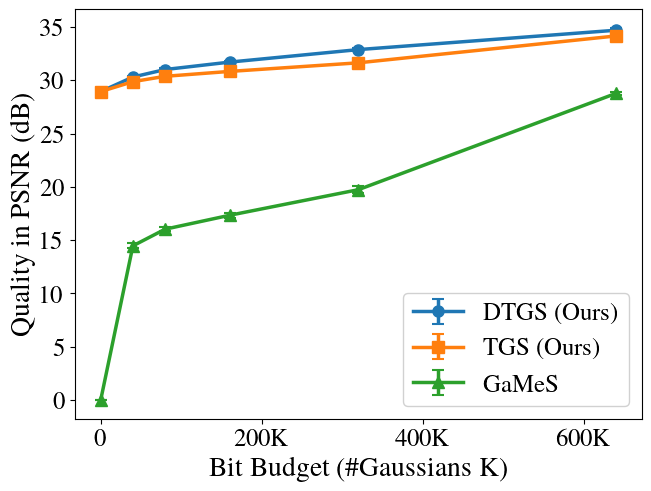


Plotting SSIM - Renderer Comparison for hotdog
Pure Mesh - SSIM: mean=0.9528, std=0.0064, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.9612, std=0.0053, splats=40000
  Budget 80000: mean=0.9653, std=0.0050, splats=80000
  Budget 160000: mean=0.9675, std=0.0054, splats=160000
  Budget 320000: mean=0.9730, std=0.0039, splats=320000
  Budget 640000: mean=0.9795, std=0.0047, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.9573, std=0.0048, splats=40000
  Budget 80000: mean=0.9600, std=0.0063, splats=80000
  Budget 160000: mean=0.9618, std=0.0074, splats=160000
  Budget 320000: mean=0.9664, std=0.0061, splats=320000
  Budget 640000: mean=0.9752, std=0.0065, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.7417, std=0.0922, splats=40000
  Budget 80000: mean=0.7616, std=0.0848, splats=80000
  Budget 160000: mean=0.7868, std=0.0773, splats=160000
  Budget 320000: mean=0.8358, std=0.0704, splats

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_hotdog.png and .eps



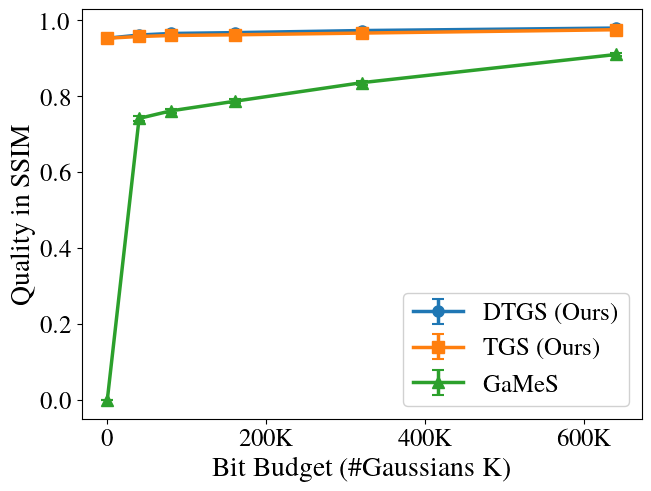


Plotting LPIPS - Renderer Comparison for hotdog
Pure Mesh - LPIPS: mean=0.0716, std=0.0124, n=200

Processing DTGS (Ours):
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=0.0404, std=0.0090, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.0706, std=0.0091, splats=40000
  Budget 80000: mean=0.0681, std=0.0077, splats=80000
  Budget 160000: mean=0.0655, std=0.0072, splats=160000
  Budget 320000: mean=0.0602, std=0.0079, splats=320000
  Budget 640000: mean=0.0452, std=0.0086, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.2222, std=0.0724, splats=40000
  Budget 80000: mean=0.2064, std=0.0675, splats=80000
  Budget 160000: mean=0.1902, std=0.0623, splats=160000
  Budget 320000: mean=0.1605, std=0.0589, splats=320000
  Budget 64000

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_renderer_comp_hotdog.png and .eps



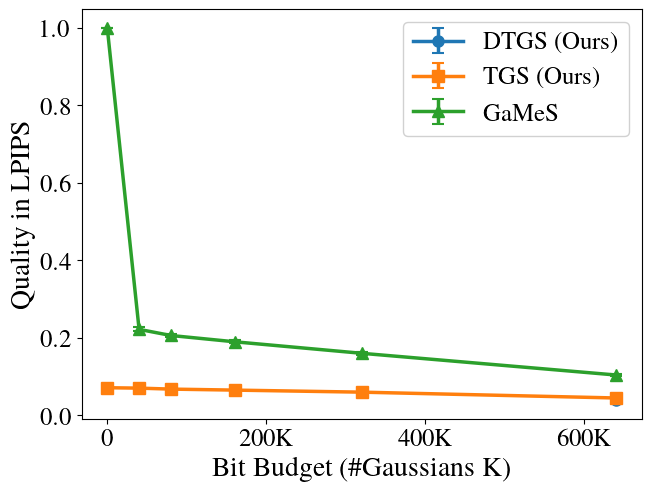


Plotting PSNR - Renderer Comparison for lego
Pure Mesh - PSNR: mean=25.3864, std=1.2767, n=200

Processing DTGS (Ours):
  Budget 40000: mean=26.1978, std=1.3996, splats=40000
  Budget 80000: mean=26.5980, std=1.5885, splats=80000
  Budget 160000: mean=27.9698, std=1.5585, splats=160000
  Budget 320000: mean=28.4245, std=1.7717, splats=320000
  Budget 640000: mean=29.0138, std=2.1155, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=25.8470, std=1.3366, splats=40000
  Budget 80000: mean=26.0106, std=1.4507, splats=80000
  Budget 160000: mean=26.6487, std=1.3009, splats=160000
  Budget 320000: mean=26.8649, std=1.4985, splats=320000
  Budget 640000: mean=26.8337, std=2.4161, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=13.5539, std=2.4233, splats=40000
  Budget 80000: mean=14.5254, std=2.7848, splats=80000
  Budget 160000: mean=17.7545, std=2.7759, splats=160000
  Budget 320000: mean=18.9867, std=2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_lego.png and .eps



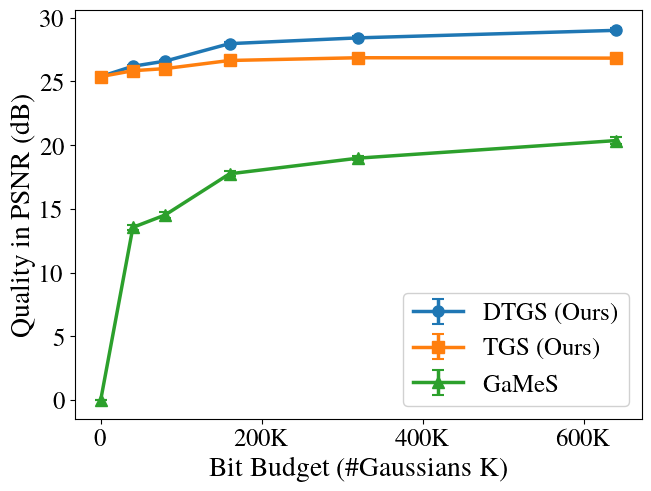


Plotting SSIM - Renderer Comparison for lego
Pure Mesh - SSIM: mean=0.9057, std=0.0095, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.9153, std=0.0094, splats=40000
  Budget 80000: mean=0.9211, std=0.0110, splats=80000
  Budget 160000: mean=0.9332, std=0.0080, splats=160000
  Budget 320000: mean=0.9383, std=0.0103, splats=320000
  Budget 640000: mean=0.9471, std=0.0133, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.9090, std=0.0091, splats=40000
  Budget 80000: mean=0.9105, std=0.0103, splats=80000
  Budget 160000: mean=0.9149, std=0.0069, splats=160000
  Budget 320000: mean=0.9177, std=0.0093, splats=320000
  Budget 640000: mean=0.9236, std=0.0205, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.7205, std=0.0424, splats=40000
  Budget 80000: mean=0.7444, std=0.0441, splats=80000
  Budget 160000: mean=0.7844, std=0.0382, splats=160000
  Budget 320000: mean=0.8169, std=0.0345, splats=3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_lego.png and .eps



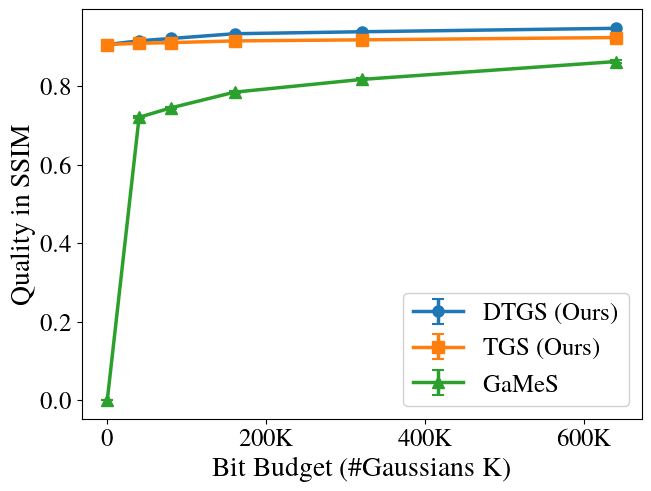


Plotting LPIPS - Renderer Comparison for lego
Pure Mesh - LPIPS: mean=0.1008, std=0.0104, n=200

Processing DTGS (Ours):
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=0.1006, std=0.0109, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.1032, std=0.0100, splats=40000
  Budget 80000: mean=0.1044, std=0.0098, splats=80000
  Budget 160000: mean=0.1055, std=0.0086, splats=160000
  Budget 320000: mean=0.1020, std=0.0097, splats=320000
  Budget 640000: mean=0.0945, std=0.0212, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.2578, std=0.0373, splats=40000
  Budget 80000: mean=0.2419, std=0.0363, splats=80000
  Budget 160000: mean=0.2153, std=0.0316, splats=160000
  Budget 320000: mean=0.1889, std=0.0271, splats=320000
  Budget 640000:

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_renderer_comp_lego.png and .eps



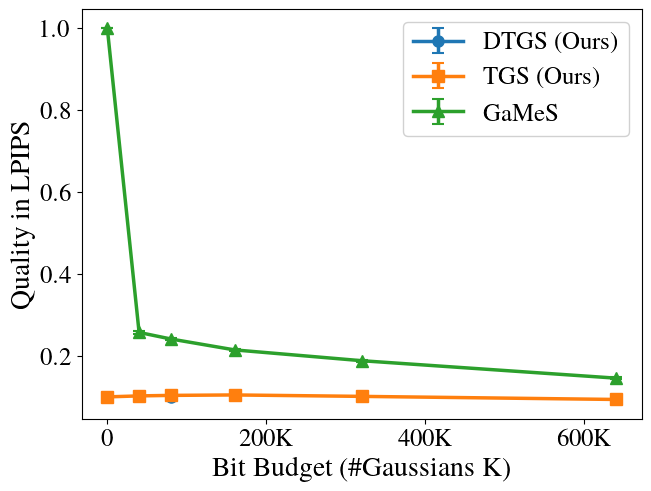


Plotting PSNR - Renderer Comparison for mic
Pure Mesh - PSNR: mean=25.0636, std=0.9433, n=200

Processing DTGS (Ours):
  Budget 40000: mean=26.7358, std=0.8150, splats=40000
  Budget 80000: mean=27.0708, std=0.7751, splats=80000
  Budget 160000: mean=27.7272, std=0.9482, splats=160000
  Budget 320000: mean=29.1427, std=1.2244, splats=320000
  Budget 640000: mean=29.5033, std=1.4232, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=27.0273, std=0.7603, splats=40000
  Budget 80000: mean=27.3780, std=0.7045, splats=80000
  Budget 160000: mean=28.1397, std=0.8825, splats=160000
  Budget 320000: mean=29.6893, std=1.2898, splats=320000
  Budget 640000: mean=30.0846, std=1.4902, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=22.8932, std=1.4687, splats=40000
  Budget 80000: mean=24.2458, std=1.3126, splats=80000
  Budget 160000: mean=26.3132, std=1.3041, splats=160000
  Budget 320000: mean=29.9030, std=1.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_mic.png and .eps



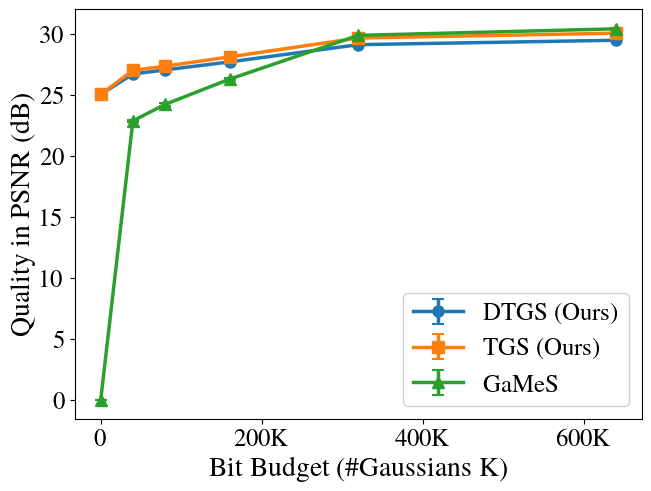


Plotting SSIM - Renderer Comparison for mic
Pure Mesh - SSIM: mean=0.9045, std=0.0152, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.9253, std=0.0107, splats=40000
  Budget 80000: mean=0.9298, std=0.0082, splats=80000
  Budget 160000: mean=0.9423, std=0.0062, splats=160000
  Budget 320000: mean=0.9546, std=0.0069, splats=320000
  Budget 640000: mean=0.9628, std=0.0067, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.9225, std=0.0101, splats=40000
  Budget 80000: mean=0.9266, std=0.0078, splats=80000
  Budget 160000: mean=0.9395, std=0.0064, splats=160000
  Budget 320000: mean=0.9540, std=0.0071, splats=320000
  Budget 640000: mean=0.9630, std=0.0067, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.9085, std=0.0146, splats=40000
  Budget 80000: mean=0.9182, std=0.0150, splats=80000
  Budget 160000: mean=0.9397, std=0.0132, splats=160000
  Budget 320000: mean=0.9668, std=0.0066, splats=32

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_mic.png and .eps



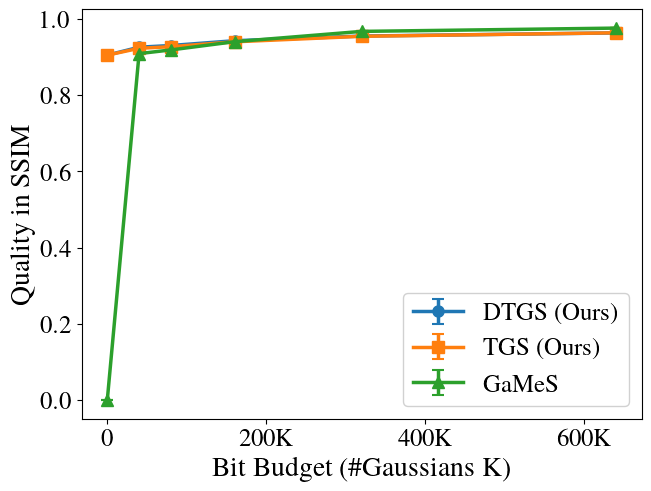


Plotting LPIPS - Renderer Comparison for mic
Pure Mesh - LPIPS: mean=0.0903, std=0.0108, n=200

Processing DTGS (Ours):
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=0.0432, std=0.0073, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.0898, std=0.0105, splats=40000
  Budget 80000: mean=0.0868, std=0.0096, splats=80000
  Budget 160000: mean=0.0730, std=0.0082, splats=160000
  Budget 320000: mean=0.0551, std=0.0079, splats=320000
  Budget 640000: mean=0.0430, std=0.0074, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.1008, std=0.0136, splats=40000
  Budget 80000: mean=0.0942, std=0.0137, splats=80000
  Budget 160000: mean=0.0723, std=0.0114, splats=160000
  Budget 320000: mean=0.0442, std=0.0083, splats=320000
  Budget 640000: 

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_renderer_comp_mic.png and .eps



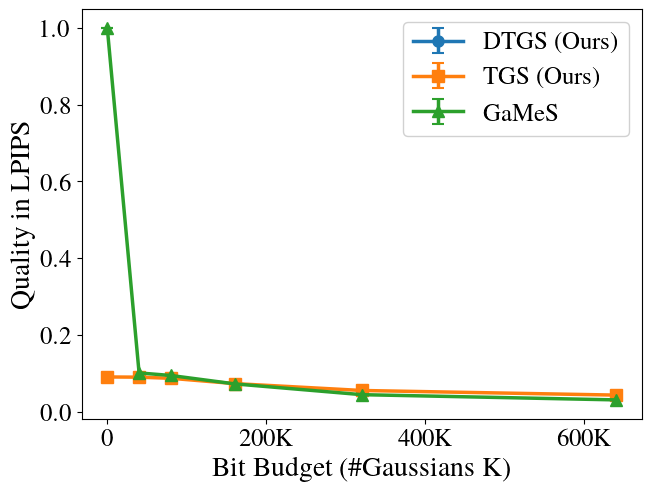


Plotting PSNR - Renderer Comparison for ship
Pure Mesh - PSNR: mean=24.9541, std=0.7644, n=200

Processing DTGS (Ours):
  Budget 40000: mean=25.4912, std=0.7276, splats=40000
  Budget 80000: mean=26.0101, std=0.6636, splats=80000
  Budget 160000: mean=26.2219, std=0.7070, splats=160000
  Budget 320000: mean=26.8025, std=0.8677, splats=320000
  Budget 640000: mean=27.9691, std=0.9990, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=25.2945, std=0.7177, splats=40000
  Budget 80000: mean=25.6648, std=0.6432, splats=80000
  Budget 160000: mean=25.7497, std=0.6949, splats=160000
  Budget 320000: mean=26.4370, std=0.9116, splats=320000
  Budget 640000: mean=27.9578, std=1.0779, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=16.7234, std=1.4191, splats=40000
  Budget 80000: mean=18.2140, std=1.5318, splats=80000
  Budget 160000: mean=19.2869, std=1.5321, splats=160000
  Budget 320000: mean=20.2039, std=1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_ship.png and .eps



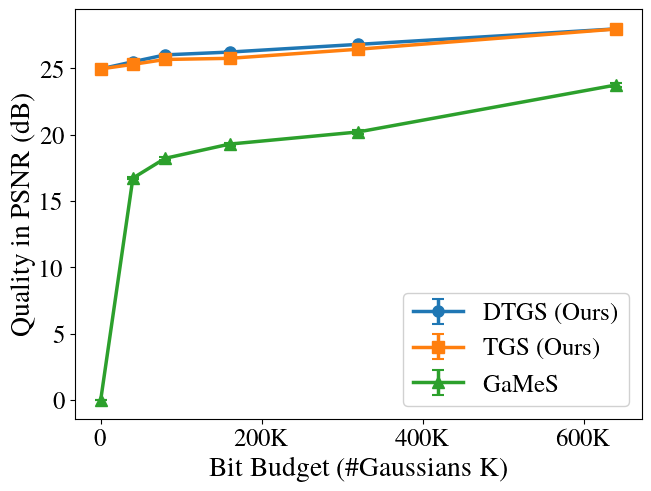


Plotting SSIM - Renderer Comparison for ship
Pure Mesh - SSIM: mean=0.8163, std=0.0390, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.8275, std=0.0373, splats=40000
  Budget 80000: mean=0.8361, std=0.0354, splats=80000
  Budget 160000: mean=0.8393, std=0.0352, splats=160000
  Budget 320000: mean=0.8499, std=0.0341, splats=320000
  Budget 640000: mean=0.8670, std=0.0305, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.8238, std=0.0355, splats=40000
  Budget 80000: mean=0.8298, std=0.0325, splats=80000
  Budget 160000: mean=0.8313, std=0.0318, splats=160000
  Budget 320000: mean=0.8443, std=0.0313, splats=320000
  Budget 640000: mean=0.8644, std=0.0283, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.5966, std=0.0639, splats=40000
  Budget 80000: mean=0.6332, std=0.0610, splats=80000
  Budget 160000: mean=0.6678, std=0.0585, splats=160000
  Budget 320000: mean=0.7022, std=0.0592, splats=3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_ship.png and .eps



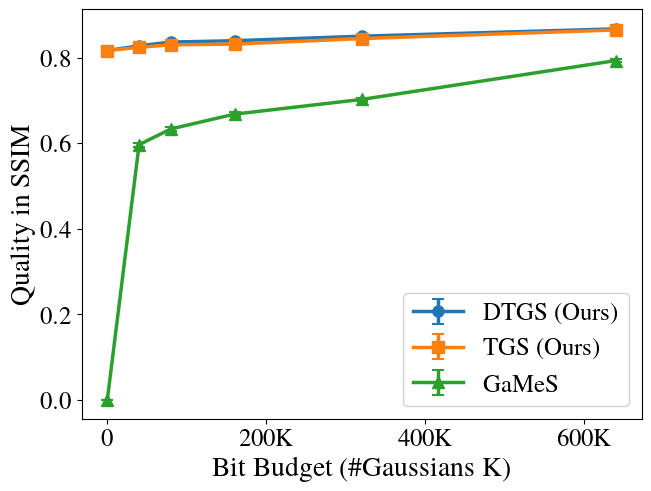


Plotting LPIPS - Renderer Comparison for ship
Pure Mesh - LPIPS: mean=0.2113, std=0.0339, n=200

Processing DTGS (Ours):
  Budget 40000: mean=0.2034, std=0.0325, splats=40000
  Budget 80000: mean=0.1943, std=0.0297, splats=80000
  Budget 160000: mean=0.1835, std=0.0291, splats=160000
  Budget 320000: mean=0.1707, std=0.0291, splats=320000
  Budget 640000: mean=0.1418, std=0.0222, splats=640000
  Plotting 6 points for DTGS (Ours)

Processing TGS (Ours):
  Budget 40000: mean=0.2073, std=0.0310, splats=40000
  Budget 80000: mean=0.2014, std=0.0275, splats=80000
  Budget 160000: mean=0.1942, std=0.0262, splats=160000
  Budget 320000: mean=0.1784, std=0.0266, splats=320000
  Budget 640000: mean=0.1473, std=0.0188, splats=640000
  Plotting 6 points for TGS (Ours)

Processing GaMeS:
  Budget 40000: mean=0.3140, std=0.0473, splats=40000
  Budget 80000: mean=0.2940, std=0.0414, splats=80000
  Budget 160000: mean=0.2752, std=0.0383, splats=160000
  Budget 320000: mean=0.2446, std=0.0382, splats

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_renderer_comp_ship.png and .eps



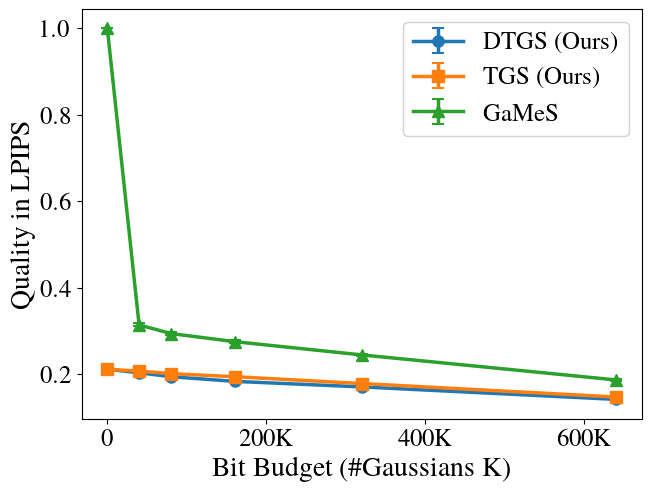

In [27]:
def plot_renderer_comp():
    """
    Compare different renderer/training pipelines (DTGS, TGS, GaMeS)
    under same budget/scene using uniform policy.
    
    the renderer used consistently in training and evaluation
    
    
    x-axis: bit budget in #Gaussians K (40k, 80k, 160k, 320k, 640k)
    y-axis: quality in PSNR/SSIM/LPIPS
    hue: [DTGS (ours), TGS (ours), GaMeS]
    """
    ITERATION = 'ours_15000'
    MESH_ITERATION = 'ours_1'
    POLICY = 'uniform'
    
    input_dir = Path('./data')
    games_dir = Path('./data/games_results')
    output_dir = Path('./plots') / 'renderer_comp' / SCENE_NAME
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define renderers/pipelines with their configurations
    renderers = [
        {'name': 'dtgs', 'label': 'DTGS (Ours)', 'marker': 'o', 'color': color_palette[0], 
         'is_games': False},
        {'name': 'tgs', 'label': 'TGS (Ours)', 'marker': 's', 'color': color_palette[1], 
         'is_games': False},  # [TODO] Need TGS data
        {'name': 'games', 'label': 'GaMeS', 'marker': '^', 'color': color_palette[2], 
         'is_games': True},
    ]
    
    budgets = [40000, 80000, 160000, 320000, 640000]
    
    metrics = {
        'PSNR': {'ylabel': 'PSNR (dB)', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'},
    }
    
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting {metric_key} - Renderer Comparison for {SCENE_NAME}")
        print(f"{'='*60}")
        
        # 1. Get Pure mesh baseline (shared across all renderers)
        mesh_mean = None
        mesh_stderr = None
        
        mesh_file = input_dir / SCENE_NAME / 'area_1_occlusion' / 'per_view_gs_mesh.json'
        if mesh_file.exists():
            with open(mesh_file, 'r') as f:
                data = json.load(f)
            
            iter_key = MESH_ITERATION if MESH_ITERATION in data else ITERATION
            
            if iter_key in data:
                metric_data = data[iter_key][metric_key]
                if isinstance(metric_data, dict):
                    values = [v for v in metric_data.values() if v != -1.0]
                else:
                    values = [metric_data]
                
                mesh_mean = np.mean(values)
                std_val = np.std(values)
                mesh_stderr = std_val / np.sqrt(len(values))
                print(f"Pure Mesh - {metric_key}: mean={mesh_mean:.4f}, std={std_val:.4f}, n={len(values)}")
        
        # 2. Process each renderer
        for renderer in renderers:
            renderer_name = renderer['name']
            is_games = renderer['is_games']
            
            xs = []
            ys = []
            errs = []
            
            # [NOTE] Our x=0 is mesh background, whereas GaMeS is blank
            if mesh_mean is not None:
                xs.append(0)
                if is_games: #GaMeS results do not include pure mesh point
                    ys.append( 1 if metric_key=='LPIPS' else 0 )
                    errs.append(0)
                else: #our DTGS/TGS results include pure mesh point
                    ys.append(mesh_mean)
                    errs.append(mesh_stderr)
            
            print(f"\nProcessing {renderer['label']}:")
            
            for budget in budgets:
                # Determine the correct file path
                if is_games:
                    # GaMeS results are in games_results folder
                    scene_dir = games_dir / SCENE_NAME
                else:
                    # DTGS/TGS results are in main data folder
                    scene_dir = input_dir / SCENE_NAME
                
                if renderer_name == 'dtgs' or renderer_name == 'games':
                    policy_file = scene_dir / f'{POLICY}_{budget}_occlusion' / 'per_view_gs_mesh.json'
                elif renderer_name == 'tgs':
                    policy_file = scene_dir / f'{POLICY}_{budget}_no_occlusion' / 'per_view_gs_mesh.json'
                
                if policy_file.exists():
                    with open(policy_file, 'r') as f:
                        data = json.load(f)
                    
                    if ITERATION in data:
                        metric_data = data[ITERATION][metric_key]
                        if isinstance(metric_data, dict):
                            values = [v for v in metric_data.values() if v != -1.0]
                        else:
                            values = [metric_data]
                        
                        mean_val = np.mean(values)
                        std_val = np.std(values)
                        stderr = std_val / np.sqrt(len(values))
                        num_splats = data[ITERATION].get('num_splats', budget)
                        
                        xs.append(num_splats)
                        ys.append(mean_val)
                        errs.append(stderr)
                        
                        print(f"  Budget {budget}: mean={mean_val:.4f}, std={std_val:.4f}, splats={num_splats}")
                else:
                    print(f"  Budget {budget}: File not found - {policy_file}")
            
            # Plot this renderer
            if xs:
                print(f"  Plotting {len(xs)} points for {renderer['label']}")
                ax.errorbar(xs, ys, yerr=errs,
                           marker=renderer['marker'], markersize=8, linewidth=2.5,
                           capsize=err_capsize, capthick=err_capthick,
                           color=renderer['color'], label=renderer['label'], zorder=2)
            else:
                print(f"  No data to plot for {renderer['label']}!")
        
        # Formatting
        ax.set_xlabel('Bit Budget (\#Gaussians K)', fontsize=20)
        ax.set_ylabel(f"Quality in {metric_info['ylabel']}", fontsize=20)
        
        # set_metric_ylim_fig(ax, metric_key, SCENE_NAME)
        
        # Format x-axis to show values in K (thousands)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x > 0 else '0'))
        
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        base_name = f'{metric_key}_renderer_comp_{SCENE_NAME}'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()


# Run for all scenes
for name in SCENE_NAME_LIST:
    SCENE_NAME = name
    plot_renderer_comp()


Plotting Average PSNR - Renderer Comparison
  ficus - Pure Mesh: 25.1996
  hotdog - Pure Mesh: 28.9337
  lego - Pure Mesh: 25.3864
  mic - Pure Mesh: 25.0636
  ship - Pure Mesh: 24.9541
  bicycle-dw50 - Pure Mesh: 21.1066
Pure Mesh Average - PSNR: mean=25.1073, std=2.2641, n=6

Processing DTGS (Ours):
  ficus @ 40000: 25.7287
  hotdog @ 40000: 30.2968
  lego @ 40000: 26.1978
  mic @ 40000: 26.7358
  ship @ 40000: 25.4912
  bicycle-dw50 @ 40000: 21.1383
  Budget 40000 Average: mean=25.9315, std=2.6766, n=6
  ficus @ 80000: 26.1382
  hotdog @ 80000: 31.0009
  lego @ 80000: 26.5980
  mic @ 80000: 27.0708
  ship @ 80000: 26.0101
  bicycle-dw50 @ 80000: 21.1452
  Budget 80000 Average: mean=26.3272, std=2.8711, n=6
  ficus @ 160000: 26.2570
  hotdog @ 160000: 31.6947
  lego @ 160000: 27.9698
  mic @ 160000: 27.7272
  ship @ 160000: 26.2219
  bicycle-dw50 @ 160000: 21.2442
  Budget 160000 Average: mean=26.8525, std=3.1001, n=6
  ficus @ 320000: 26.3771
  hotdog @ 320000: 32.8689
  lego @ 320

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_renderer_comp_average.png and .eps



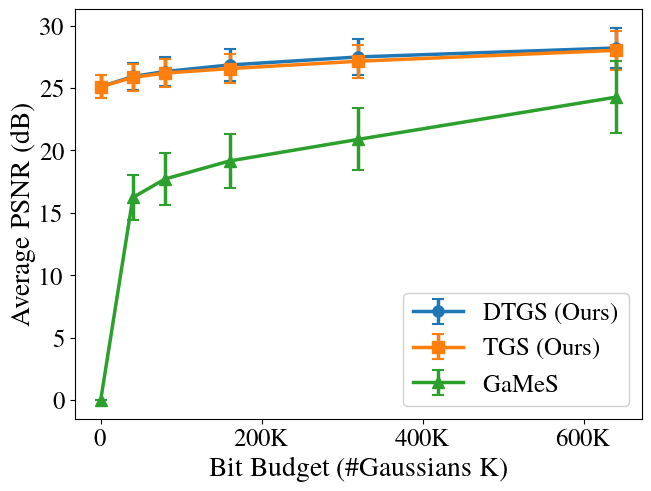


Plotting Average SSIM - Renderer Comparison
  ficus - Pure Mesh: 0.9124
  hotdog - Pure Mesh: 0.9528
  lego - Pure Mesh: 0.9057
  mic - Pure Mesh: 0.9045
  ship - Pure Mesh: 0.8163
  bicycle-dw50 - Pure Mesh: 0.5360
Pure Mesh Average - SSIM: mean=0.8380, std=0.1411, n=6

Processing DTGS (Ours):
  ficus @ 40000: 0.9201
  hotdog @ 40000: 0.9612
  lego @ 40000: 0.9153
  mic @ 40000: 0.9253
  ship @ 40000: 0.8275
  bicycle-dw50 @ 40000: 0.5380
  Budget 40000 Average: mean=0.8479, std=0.1444, n=6
  ficus @ 80000: 0.9255
  hotdog @ 80000: 0.9653
  lego @ 80000: 0.9211
  mic @ 80000: 0.9298
  ship @ 80000: 0.8361
  bicycle-dw50 @ 80000: 0.5388
  Budget 80000 Average: mean=0.8528, std=0.1457, n=6
  ficus @ 160000: 0.9280
  hotdog @ 160000: 0.9675
  lego @ 160000: 0.9332
  mic @ 160000: 0.9423
  ship @ 160000: 0.8393
  bicycle-dw50 @ 160000: 0.5418
  Budget 160000 Average: mean=0.8587, std=0.1472, n=6
  ficus @ 320000: 0.9321
  hotdog @ 320000: 0.9730
  lego @ 320000: 0.9383
  mic @ 320000: 0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_renderer_comp_average.png and .eps



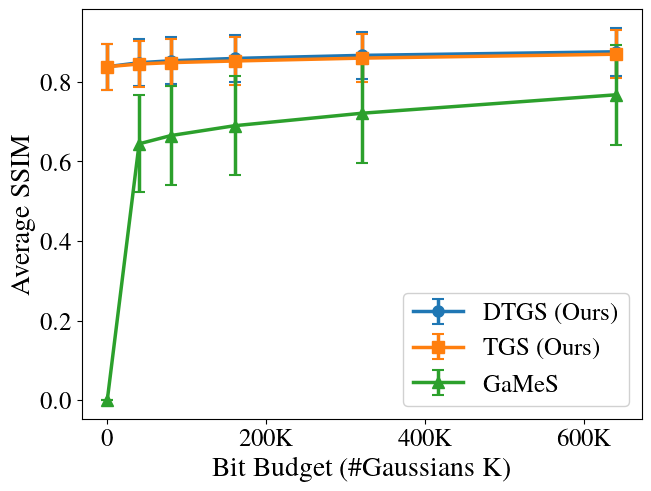


Plotting Average LPIPS - Renderer Comparison
  ficus - Pure Mesh: 0.0881
  hotdog - Pure Mesh: 0.0716
  lego - Pure Mesh: 0.1008
  mic - Pure Mesh: 0.0903
  ship - Pure Mesh: 0.2113
  bicycle-dw50 - Pure Mesh: 0.4476
Pure Mesh Average - LPIPS: mean=0.1683, std=0.1331, n=6

Processing DTGS (Ours):
  ficus @ 40000: 0.0900
  hotdog @ 40000: nan
  lego @ 40000: nan
  mic @ 40000: nan
  ship @ 40000: 0.2034
  bicycle-dw50 @ 40000: 0.4473
  Budget 40000 Average: mean=nan, std=nan, n=6
  ficus @ 80000: 0.0885
  hotdog @ 80000: nan
  lego @ 80000: 0.1006
  mic @ 80000: nan
  ship @ 80000: 0.1943
  bicycle-dw50 @ 80000: 0.4464
  Budget 80000 Average: mean=nan, std=nan, n=6
  ficus @ 160000: nan
  hotdog @ 160000: nan
  lego @ 160000: nan
  mic @ 160000: nan
  ship @ 160000: 0.1835
  bicycle-dw50 @ 160000: 0.4484
  Budget 160000 Average: mean=nan, std=nan, n=6
  ficus @ 320000: nan
  hotdog @ 320000: nan
  lego @ 320000: nan
  mic @ 320000: nan
  ship @ 320000: 0.1707
  bicycle-dw50 @ 320000: 0

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: LPIPS_renderer_comp_average.png and .eps



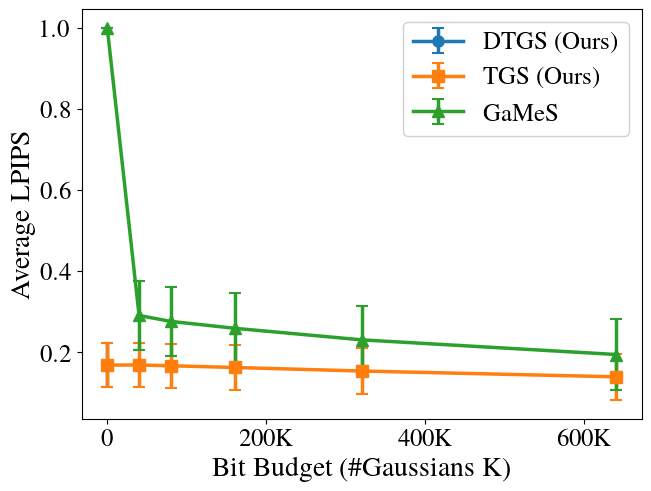

In [28]:
def plot_renderer_comp_average():
    """
    Compare different renderer/training pipelines (DTGS, TGS, GaMeS)
    the renderer used consistently in training and evaluation
    averaged across all scenes using uniform policy.
    
    x-axis: bit budget in #Gaussians K (40k, 80k, 160k, 320k, 640k)
    y-axis: average quality in PSNR/SSIM/LPIPS across all scenes
    hue: [DTGS (ours), TGS (ours), GaMeS]
    """
    ITERATION = 'ours_15000'
    MESH_ITERATION = 'ours_1'
    POLICY = 'uniform'
    
    SCENES = ['ficus', 'hotdog', 'lego', 'mic', 'ship', 'bicycle-dw50']
    
    input_dir = Path('./data')
    games_dir = Path('./data/games_results')
    output_dir = Path('./plots') / 'renderer_comp_average'
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define renderers/pipelines with their configurations
    renderers = [
        {'name': 'dtgs', 'label': 'DTGS (Ours)', 'marker': 'o', 'color': color_palette[0], 
         'is_games': False},
        {'name': 'tgs', 'label': 'TGS (Ours)', 'marker': 's', 'color': color_palette[1], 
         'is_games': False},  
        {'name': 'games', 'label': 'GaMeS', 'marker': '^', 'color': color_palette[2], 
         'is_games': True},
    ]
    
    budgets = [40000, 80000, 160000, 320000, 640000]
    
    metrics = {
        'PSNR': {'ylabel': 'PSNR (dB)', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'},
    }
    
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting Average {metric_key} - Renderer Comparison")
        print(f"{'='*60}")
        
        # 1. Get Pure mesh baseline averaged across all scenes
        mesh_values_all_scenes = []
        
        for scene in SCENES:
            mesh_file = input_dir / scene / 'area_1_occlusion' / 'per_view_gs_mesh.json'
            if mesh_file.exists():
                with open(mesh_file, 'r') as f:
                    data = json.load(f)
                
                iter_key = MESH_ITERATION if MESH_ITERATION in data else ITERATION
                
                if iter_key in data:
                    metric_data = data[iter_key][metric_key]
                    if isinstance(metric_data, dict):
                        values = [v for v in metric_data.values() if v != -1.0]
                        scene_mean = np.mean(values)
                    else:
                        scene_mean = metric_data
                    
                    mesh_values_all_scenes.append(scene_mean)
                    print(f"  {scene} - Pure Mesh: {scene_mean:.4f}")
        
        mesh_mean = None
        mesh_stderr = None
        if mesh_values_all_scenes:
            mesh_mean = np.mean(mesh_values_all_scenes)
            mesh_std = np.std(mesh_values_all_scenes)
            mesh_stderr = mesh_std / np.sqrt(len(mesh_values_all_scenes))
            print(f"Pure Mesh Average - {metric_key}: mean={mesh_mean:.4f}, std={mesh_std:.4f}, n={len(mesh_values_all_scenes)}")
        
        # 2. Process each renderer
        for renderer in renderers:
            renderer_name = renderer['name']
            is_games = renderer['is_games']
            
            xs = []
            ys = []
            errs = []
            
           # [NOTE] Our x=0 is mesh background, whereas GaMeS is blank
            if mesh_mean is not None:
                xs.append(0)
                if is_games: #GaMeS results do not include pure mesh point
                    ys.append( 1 if metric_key=='LPIPS' else 0 )
                    errs.append(0)
                else: #our DTGS/TGS results include pure mesh point
                    ys.append(mesh_mean)
                    errs.append(mesh_stderr)
            
            print(f"\nProcessing {renderer['label']}:")
            
            for budget in budgets:
                # Collect values across all scenes for this budget
                budget_values_all_scenes = []
                
                for scene in SCENES:
                    # Determine the correct file path
                    if is_games:
                        scene_dir = games_dir / scene
                    else:
                        scene_dir = input_dir / scene
                    
                    if renderer_name == 'dtgs' or renderer_name == 'games':
                        policy_file = scene_dir / f'{POLICY}_{budget}_occlusion' / 'per_view_gs_mesh.json'
                    else:
                        policy_file = scene_dir / f'{POLICY}_{budget}_no_occlusion' / 'per_view_gs_mesh.json'
                    
                    if policy_file.exists():
                        with open(policy_file, 'r') as f:
                            data = json.load(f)
                        
                        if ITERATION in data:
                            metric_data = data[ITERATION][metric_key]
                            if isinstance(metric_data, dict):
                                values = [v for v in metric_data.values() if v != -1.0]
                                scene_mean = np.mean(values)
                            else:
                                scene_mean = metric_data
                            
                            budget_values_all_scenes.append(scene_mean)
                            print(f"  {scene} @ {budget}: {scene_mean:.4f}")
                    else:
                        print(f"  {scene} @ {budget}: File not found")
                
                # Compute average across scenes
                if budget_values_all_scenes:
                    mean_val = np.mean(budget_values_all_scenes)
                    std_val = np.std(budget_values_all_scenes)
                    stderr = std_val / np.sqrt(len(budget_values_all_scenes))
                    
                    xs.append(budget)
                    ys.append(mean_val)
                    errs.append(stderr)
                    
                    print(f"  Budget {budget} Average: mean={mean_val:.4f}, std={std_val:.4f}, n={len(budget_values_all_scenes)}")
            
            # Plot this renderer
            if xs:
                print(f"  Plotting {len(xs)} points for {renderer['label']}")
                ax.errorbar(xs, ys, yerr=errs,
                           marker=renderer['marker'], markersize=8, linewidth=2.5,
                           capsize=err_capsize, capthick=err_capthick,
                           color=renderer['color'], label=renderer['label'], zorder=2)
            else:
                print(f"  No data to plot for {renderer['label']}!")
        
        # Formatting
        ax.set_xlabel('Bit Budget (\#Gaussians K)', fontsize=20)
        ax.set_ylabel(f"Average {metric_info['ylabel']}", fontsize=20)
        
        # Format x-axis to show values in K (thousands)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x > 0 else '0'))
        
        
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        base_name = f'{metric_key}_renderer_comp_average'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()


# Run averaged comparison
plot_renderer_comp_average()

## Fig Mesh Downsampling


Plotting PSNR - Mesh Downsampling Comparison
bicycle - Pure Mesh: 21.3111

Processing Full Mesh:
  Budget 40000: mean=21.7302, std=1.6472, splats=40000
  Budget 80000: mean=21.8592, std=1.6791, splats=80000
  Budget 160000: mean=21.9960, std=1.7165, splats=160000
  Budget 320000: mean=22.1876, std=1.7636, splats=320000
  Budget 640000: mean=22.4416, std=1.8678, splats=640000
  Plotting 6 points for Full Mesh
bicycle-dw50 - Pure Mesh: 21.1066

Processing Downsample 50\%:
  Budget 40000: mean=21.5879, std=1.5921, splats=40000
  Budget 80000: mean=21.7728, std=1.6358, splats=80000
  Budget 160000: mean=21.9931, std=1.6980, splats=160000
  Budget 320000: mean=22.2706, std=1.7988, splats=320000
  Budget 640000: mean=22.6063, std=1.9350, splats=640000
  Plotting 6 points for Downsample 50\%
bicycle-dw30 - Pure Mesh: 20.6685

Processing Downsample 30\%:
  Budget 40000: mean=21.4285, std=1.5408, splats=40000
  Budget 80000: mean=21.6246, std=1.6039, splats=80000
  Budget 160000: mean=21.8544,

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_mesh_downsampling_comp.png and .eps



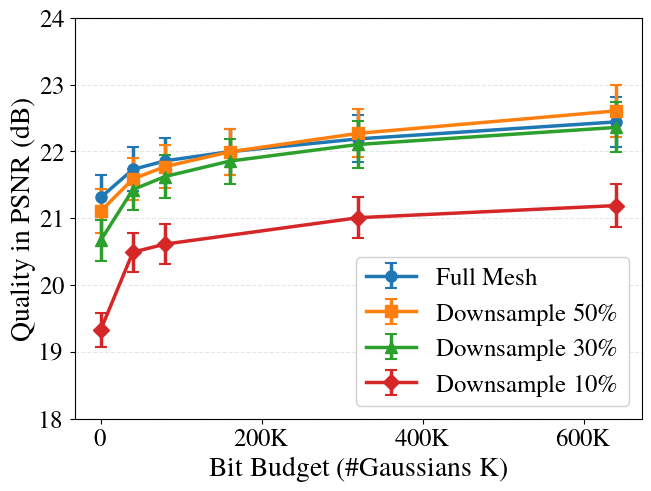


Plotting SSIM - Mesh Downsampling Comparison
bicycle - Pure Mesh: 0.5647

Processing Full Mesh:
  Budget 40000: mean=0.5713, std=0.0713, splats=40000
  Budget 80000: mean=0.5750, std=0.0719, splats=80000
  Budget 160000: mean=0.5805, std=0.0726, splats=160000
  Budget 320000: mean=0.5901, std=0.0738, splats=320000
  Budget 640000: mean=0.6061, std=0.0762, splats=640000
  Plotting 6 points for Full Mesh
bicycle-dw50 - Pure Mesh: 0.5360

Processing Downsample 50\%:
  Budget 40000: mean=0.5458, std=0.0650, splats=40000
  Budget 80000: mean=0.5524, std=0.0657, splats=80000
  Budget 160000: mean=0.5648, std=0.0671, splats=160000
  Budget 320000: mean=0.5848, std=0.0706, splats=320000
  Budget 640000: mean=0.6106, std=0.0740, splats=640000
  Plotting 6 points for Downsample 50\%
bicycle-dw30 - Pure Mesh: 0.4791

Processing Downsample 30\%:
  Budget 40000: mean=0.5050, std=0.0520, splats=40000
  Budget 80000: mean=0.5195, std=0.0541, splats=80000
  Budget 160000: mean=0.5374, std=0.0567, spl

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_mesh_downsampling_comp.png and .eps



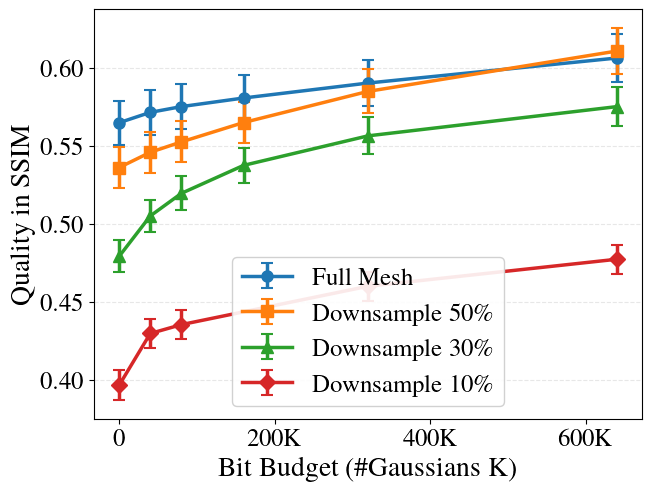


Plotting LPIPS - Mesh Downsampling Comparison
bicycle - Pure Mesh: nan

Processing Full Mesh:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats=320000
  Budget 640000: mean=nan, std=nan, splats=640000
  Plotting 6 points for Full Mesh
bicycle-dw50 - Pure Mesh: 0.4476

Processing Downsample 50\%:
  Budget 40000: mean=0.4462, std=0.0305, splats=40000
  Budget 80000: mean=0.4430, std=0.0304, splats=80000
  Budget 160000: mean=0.4364, std=0.0306, splats=160000
  Budget 320000: mean=0.4192, std=0.0325, splats=320000
  Budget 640000: mean=0.3909, std=0.0350, splats=640000
  Plotting 6 points for Downsample 50\%
bicycle-dw30 - Pure Mesh: nan

Processing Downsample 30\%:
  Budget 40000: mean=nan, std=nan, splats=40000
  Budget 80000: mean=nan, std=nan, splats=80000
  Budget 160000: mean=nan, std=nan, splats=160000
  Budget 320000: mean=nan, std=nan, splats

/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/data1/samk/anaconda3/envs/meshsplat/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 


Saved: LPIPS_mesh_downsampling_comp.png and .eps



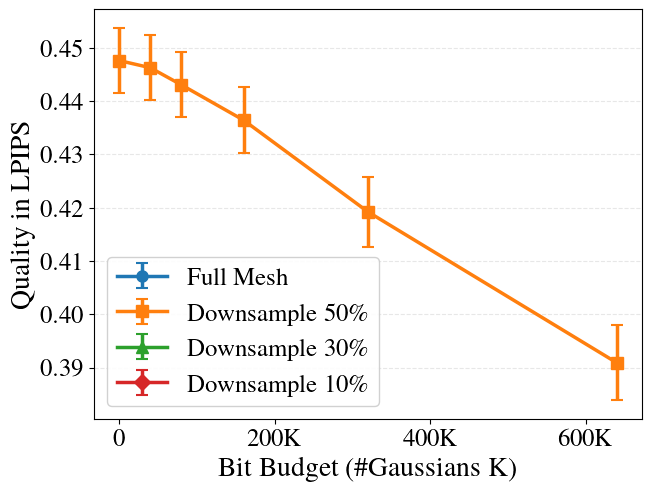

In [29]:
def plot_base_mesh_quality_comp():
    """
    Compare quality metrics for different mesh downsampling rates.
    
    Policy: distortion
    Budget: 0, 40K, 80K, 160K, 320K, 640K
    Iteration: 15K
    Scenes: bicycle (full, dw50, dw30, dw10)
    """
    ITERATION = 'ours_15000'
    MESH_ITERATION = 'ours_1'
    POLICY = 'distortion'
    
    input_dir = Path('./data')
    output_dir = Path('./plots') / 'mesh_downsampling_comp'
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define mesh variants with their configurations
    mesh_variants = [
        {'name': 'bicycle', 'label': 'Full Mesh', 'marker': 'o', 'color': color_palette[0]},
        {'name': 'bicycle-dw50', 'label': 'Downsample 50\%', 'marker': 's', 'color': color_palette[1]},
        {'name': 'bicycle-dw30', 'label': 'Downsample 30\%', 'marker': '^', 'color': color_palette[2]},
        {'name': 'bicycle-dw10', 'label': 'Downsample 10\%', 'marker': 'D', 'color': color_palette[3]},
    ]
    
    budgets = [40000, 80000, 160000, 320000, 640000]
    
    metrics = {
        'PSNR': {'ylabel': 'PSNR (dB)', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'},
    }
    
    # Collect data for each metric
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting {metric_key} - Mesh Downsampling Comparison")
        print(f"{'='*60}")
        
        # Process each mesh variant
        for variant in mesh_variants:
            scene_name = variant['name']
            scene_dir = input_dir / scene_name
            
            xs = []
            ys = []
            errs = []
            
            # Get pure mesh baseline (budget = 0)
            mesh_file = scene_dir / 'area_1_occlusion' / 'per_view_gs_mesh.json'
            
            if mesh_file.exists():
                with open(mesh_file, 'r') as f:
                    mesh_data = json.load(f)
                
                iter_key = MESH_ITERATION if MESH_ITERATION in mesh_data else ITERATION
                
                if iter_key in mesh_data:
                    metric_data = mesh_data[iter_key][metric_key]
                    if isinstance(metric_data, dict):
                        values = [v for v in metric_data.values() if v != -1.0]
                    else:
                        values = [metric_data]
                    
                    mesh_mean = np.mean(values)
                    std_val = np.std(values)
                    mesh_stderr = std_val / np.sqrt(len(values))
                    
                    # Add pure mesh point at budget=0
                    xs.append(0)
                    ys.append(mesh_mean)
                    errs.append(mesh_stderr)
                    
                    print(f"{scene_name} - Pure Mesh: {mesh_mean:.4f}")
            
            # Get policy+budget results for each budget
            print(f"\nProcessing {variant['label']}:")
            for budget in budgets:
                policy_file = scene_dir / f'{POLICY}_{budget}_occlusion' / 'per_view_gs_mesh.json'
                
                if policy_file.exists():
                    with open(policy_file, 'r') as f:
                        data = json.load(f)
                    
                    if ITERATION in data:
                        metric_data = data[ITERATION][metric_key]
                        if isinstance(metric_data, dict):
                            values = [v for v in metric_data.values() if v != -1.0]
                        else:
                            values = [metric_data]
                        
                        mean_val = np.mean(values)
                        std_val = np.std(values)
                        stderr = std_val / np.sqrt(len(values))
                        num_splats = data[ITERATION].get('num_splats', budget)
                        
                        xs.append(num_splats)
                        ys.append(mean_val)
                        errs.append(stderr)
                        
                        print(f"  Budget {budget}: mean={mean_val:.4f}, std={std_val:.4f}, splats={num_splats}")
                else:
                    print(f"  Budget {budget}: File not found - {policy_file}")
            
            # Plot this mesh variant
            if xs:
                print(f"  Plotting {len(xs)} points for {variant['label']}")
                ax.errorbar(xs, ys, yerr=errs,
                           marker=variant['marker'], markersize=8, linewidth=2.5,
                           capsize=err_capsize, capthick=err_capthick,
                           color=variant['color'], label=variant['label'], zorder=2)
            else:
                print(f"  No data to plot for {variant['label']}!")
        
        # Formatting
        ax.set_xlabel('Bit Budget (\#Gaussians K)', fontsize=20)
        ax.set_ylabel(f"Quality in {metric_info['ylabel']}", fontsize=20)
        
        # Format x-axis to show values in K (thousands)
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x > 0 else '0'))
        
        set_metric_ylim_mesh_downsample(ax, metric_key)
        
        # Add grid for readability
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)
        
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        # Save both formats
        base_name = f'{metric_key}_mesh_downsampling_comp'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()


# Run the comparison
def set_metric_ylim_mesh_downsample(ax, metric_key):
    """
    Set fixed y-axis limits for delta plots.
    
    Args:
        ax: matplotlib axes object
        metric_key: string, one of 'PSNR', 'SSIM', 'LPIPS'
    """
    if metric_key == 'PSNR':
        ax.set_ylim(18,24)  # Delta range for PSNR improvement
    elif metric_key == 'SSIM':
        # ax.set_ylim()  # Delta range for SSIM improvement
        pass
    elif metric_key == 'LPIPS':
        # ax.set_ylim(-0.15, 0.01)  # Delta range for LPIPS improvement (lower is better)
        pass


# Run the comparison
plot_base_mesh_quality_comp()